In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

## Зареждане и поглед върху данните, с които ще работим

In [3]:
dataset = pd.read_csv('../data/bg-car-offers.csv')

dataset.shape

(99693, 26)

Файлът с обяви за продажба на автомобили съдържа 99 693 записа (обяви) и 26 колони с данни за всяка обява. Нека разгледаме няколко записа от него:

In [4]:
dataset.sample(10)

Make     Model BodyType ManufactureDate  FuelType  \
54295  Mercedes-Benz   GLA 200     Джип         02/2018   Дизелов   
72729        Porsche       911     Купе         10/2021  Бензинов   
83855         Toyota     Auris   Хечбек         08/2008   Дизелов   
15076            BMW   5-серия    Седан         03/2014  Бензинов   
12169            BMW   3-серия    Седан         07/2009   Дизелов   
77294           Seat     Ibiza   Хечбек         03/2009   Дизелов   
37205        Hyundai    Sonata    Седан         07/2020  Бензинов   
9434            Audi       Rs6    Комби         11/2014  Бензинов   
23433        Citroen  C-Elysee    Седан         10/2016   Дизелов   
7221            Audi        A8    Седан         11/2018   Дизелов   

      Transmission  EngineSize  Horsepower EuroStandard   Mileage  ...  \
54295  Автоматична         NaN      136.00       Евро 6 175000.00  ...   
72729  Автоматична     3745.00      650.00       Евро 6  12500.00  ...   
83855        Ръчна     2200.00      177.00       Евро 4 182760.00  ...   
15076  Автоматична     3000.00      306.00       Евро 5 109000.00  ...   
12169  Автоматична     2000.00      177.00       Евро 5 281000.00  ...   
77294        Ръчна     1400.00       80.00          NaN 175000.00  ...   
37205  Автоматична     2000.00      155.00       Евро 6  47669.00  ...   
9434   Автоматична     3998.00      560.00          NaN 201000.00  ...   
23433        Ръчна     1600.00      112.00       Евро 6 171000.00  ...   
7221   Автоматична     3000.00      286.00       Евро 6 147800.00  ...   

                                         ComfortFeatures  \
54295  Auto Start Stop function, Bluetooth \ handsfre...   
72729  Auto Start Stop function, Bluetooth \ handsfre...   
83855  Безключово палене, Ел. Стъкла, Климатик, Мулти...   
15076  Auto Start Stop function, Bluetooth \ handsfre...   
12169  Bluetooth \ handsfree система, DVD, TV, Steptr...   
77294  Бордкомпютър, Датчик за светлина, Ел. Огледала...   
37205  Bluetooth \ handsfree система, USB, audio\vide...   
9434                                                 NaN   
23433  USB, audio\video, IN\AUX изводи, Бордкомпютър,...   
7221   Auto Start Stop function, Bluetooth \ handsfre...   

                                           OtherFeatures  \
54295  4x4, Напълно обслужен, С регистрация, Сервизна...   
72729                      4x4, Buy back, Бартер, Лизинг   
83855                                      С регистрация   
15076  Бартер, Лизинг, Напълно обслужен, С регистраци...   
12169                                   Лизинг, Нов внос   
77294  Лизинг, Напълно обслужен, Нов внос, Сервизна к...   
37205  Buy back, Газова уредба, Лизинг, Напълно обслу...   
9434                                                 NaN   
23433                    Напълно обслужен, С регистрация   
7221   4x4, Buy back, Бартер, Лизинг, Напълно обслуже...   

                                        ExteriorFeatures  \
54295  4(5) Врати, LED фарове, Ксенонови фарове, Лети...   
72729  2(3) Врати, LED фарове, Ксенонови фарове, Лети...   
83855  4(5) Врати, LED фарове, Ксенонови фарове, Лети...   
15076  4(5) Врати, LED фарове, Ксенонови фарове, Лети...   
12169  4(5) Врати, Ксенонови фарове, Лети джанти, Мет...   
77294  4(5) Врати, Лети джанти, Металик, Халогенни фа...   
37205  4(5) Врати, Лети джанти, Металик, Халогенни фа...   
9434                                                 NaN   
23433           4(5) Врати, LED фарове, Халогенни фарове   
7221   4(5) Врати, LED фарове, Ксенонови фарове, Лети...   

                          SecurityFeatures            InteriorFeatures  \
54295  Аларма, Каско, Централно заключване                 Кожен салон   
72729  Аларма, Каско, Централно заключване                 Кожен салон   
83855         Аларма, Централно заключване               Велурен салон   
15076          Каско, Централно заключване                 Кожен салон   
12169         Аларма, Централно заключване                         NaN   
77294         

Виждаме, че файлът съдържа информация, която бихме очаквали да намерим, когато търсим да закупим автомобил: марката, модела, датата на производство, типа на двигателя и трансмисията, цвета, наличните екстри и оборудване, и, разбира се, цената на автомобила. Разполагаме също и с данни, които не описват предлагания автомобил, а са данни за самата обява като заглавие и брой преглеждания на обявата. Тези данни може да са полезни за анализа, но няма да ги включваме в модела за предсказване на цената на автомобила, тъй като искаме да предскажем цената на автомобила единствено на базата на неговите характеристики.

Поради факта, че тези данни са попълвани от потребители в интернет, на доста места се наблюдават непопълнени данни, които ще трябва да обработим преди да започнем да обучаваме какъвто и да е модел за предсказване на цената на автомобила.

Нека разгледаме типа на данните във файла:

In [5]:
dataset.dtypes

Make                        object
Model                       object
BodyType                    object
ManufactureDate             object
FuelType                    object
Transmission                object
EngineSize                 float64
Horsepower                 float64
EuroStandard                object
Mileage                    float64
MilesPerFullCharge (EV)    float64
BatteryCapacity (EV)       float64
Color                       object
VIN                         object
Price                       object
SafetyFeatures              object
ComfortFeatures             object
OtherFeatures               object
ExteriorFeatures            object
SecurityFeatures            object
InteriorFeatures            object
SpecialisedFeatures         object
Region                      object
City                        object
ViewCount                    int64
OfferTitle                  object
dtype: object

Виждаме, че имаме данни от тип `object` (текстови данни), `float64` (дробни числа) и `int64` (цели числа).

Числовите колони са:
- `EngineSize` - обем на двигателя
- `Horsepower` - мощност на двигателя
- `Mileage` - пробег на автомобила
- `MilesPerFullCharge (EV)` - пробег на електрически автомобили с едно зареждане
- `BatteryCapacity (EV)` - капацитет на батерията на електрически автомобили
- `ViewCount` - брой преглеждания на обявата

Текстовите колони са:
- `Make` - марка на автомобила
- `Model` - модел на автомобила
- `BodyType` - тип на купето
- `ManufactureDate` - дата на производство
- `FuelType` - тип на горивото
- `Transmission` - тип на трансмисията
- `EuroStandard` - евростандарт на автомобила
- `Color` - цвят на автомобила
- `VIN` - VIN номер на автомобила
- `Price` - цена на автомобила (Интересно е, че тази колона не е от числов тип - трябва да разберем защо)
- `SafetyFeatures` - налични екстри за сигурност
- `ComfortFeatures` - налични екстри за комфорт
- `OtherFeatures` - други налични екстри
- `ExteriorFeatures` - външни екстри
- `InteriorFeatures` - вътрешни екстри
- `SpecialisedFeatures` - специализирани екстри
- `Region` - област, в която се намира автомобилът
- `City` - населено място, в което се намира автомобилът
- `OfferTitle` - заглавие на обявата

In [6]:
dataset.describe(include='all')

Make  Model BodyType ManufactureDate FuelType Transmission  \
count           99693  99693    99693           99535    99693        99693   
unique            111   1401       11             682        5            3   
top     Mercedes-Benz   Golf     Джип         10/2008  Дизелов  Автоматична   
freq            13678   2482    26169             628    54090        51292   
mean              NaN    NaN      NaN             NaN      NaN          NaN   
std               NaN    NaN      NaN             NaN      NaN          NaN   
min               NaN    NaN      NaN             NaN      NaN          NaN   
25%               NaN    NaN      NaN             NaN      NaN          NaN   
50%               NaN    NaN      NaN             NaN      NaN          NaN   
75%               NaN    NaN      NaN             NaN      NaN          NaN   
max               NaN    NaN      NaN             NaN      NaN          NaN   

        EngineSize  Horsepower EuroStandard    Mileage  ...  \
count     73390.00    94274.00        77655   99281.00  ...   
unique         NaN         NaN            6        NaN  ...   
top            NaN         NaN       Евро 6        NaN  ...   
freq           NaN         NaN        27057        NaN  ...   
mean       2216.35      186.93          NaN  179730.93  ...   
std        1433.42      125.41          NaN  148739.99  ...   
min           1.00        1.00          NaN       1.00  ...   
25%        1600.00      110.00          NaN  125635.00  ...   
50%        2000.00      150.00          NaN  183000.00  ...   
75%        2500.00      224.00          NaN  227150.00  ...   
max       62000.00     2400.00          NaN 9999999.00  ...   

                           ComfortFeatures  OtherFeatures  \
count                                85591          83842   
unique                               47830           2336   
top     Ел. Огледала, Ел. Стъкла, Климатик       Нов внос   
freq                                   404           5706   
mean                                   NaN            NaN   
std                                    NaN            NaN   
min                                    NaN            NaN   
25%                                    NaN            NaN   
50%                                    NaN            NaN   
75%                                    NaN            NaN   
max                                    NaN            NaN   

                                         ExteriorFeatures  \
count                                               84209   
unique                                               1639   
top     4(5) Врати, Лети джанти, Металик, Халогенни фа...   
freq                                                 7209   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                    SecurityFeatures InteriorFeatures SpecialisedFeatures  \
count                          75838            44829                1884   
unique                            43                7                  11   
top     Аларма, Централно заключване      Кожен салон      Хомологация N1   
freq                           35944            35393                1261   
mean                             NaN              NaN                 NaN   
std                              NaN              NaN                 NaN   
min                              NaN              NaN                 NaN   
25%                              NaN              NaN                 NaN   
50%                              NaN              NaN                 NaN   
75%                              NaN              NaN                 NaN  

## Price - целевата променлива

Нека започнем подробния анализ с нашата целева променлива - обявената цена на автомобила `Price`.
Да разгледаме разпределението на цените на автомобилите:

In [7]:
prices = dataset['Price']

prices.value_counts(dropna=False)

Price
6500             888
При запитване    822
5500             811
7500             769
8500             764
                ... 
130900             1
174000             1
122980             1
98980              1
91587              1
Name: count, Length: 7008, dtype: int64

Оказва се, че в доста от обявите няма определена точна цена, а вместо това е посочено `"При запитване"`. Това е и причината тази колона да не е от числов тип. Ще трябва да обработим тези записи преди да можем да използваме тази колона за обучение на модела. Да видим дали няма и други текстови стойности в тази колона:

In [8]:
prices[prices.str.contains('[a-zA-Z]')].value_counts()

Price
5500USD     1
67000USD    1
54000USD    1
12500USD    1
14000USD    1
43000USD    1
40000USD    1
16000USD    1
Name: count, dtype: int64

Имаме 8 обяви с цена, обявена в долари. Ще трябва да преобразуваме тези цени в левове, за да можем да ги използваме за обучение на модела.

Да видим как изглежда разпределението на цените на автомобилите:

In [9]:
numeric_prices = prices[~prices.str.contains('[a-zA-Zа-яА-Я]')].astype(float).round()

numeric_prices.describe()

count      98863.00
mean       31984.28
std        90998.63
min           11.00
25%         7700.00
50%        14999.00
75%        33000.00
max     19558298.00
Name: Price, dtype: float64

Веднага се забелязват няколко неща:
- най-ниската цена на автомобил е 11 лева, което е изключително ниска стойност и най-вероятно е въведена за привличане на внимание към обявата, т.е. бихме могли да я считаме за аутлайър и да не взимаме подобни цени под внимание, тъй като могат да повлият негативно на точността на модела
- най-високата цена на автомобил е 19 558 298 лева, което също е много висока стойност и може да бъде аутлайър
- 75% от автомобилите са на цена до 33 000 лева, едва 25% са на цена над тази стойност - доста по-големите цени са рядкост и може да се окаже, че са аутлайъри, които да не вземаме под внимание

Да видим как изглежда разпределението на цените на автомобилите графично:

<Axes: title={'center': 'Разпределение на цените на автомобилите'}, xlabel='Цена (лв.)', ylabel='Брой обяви'>

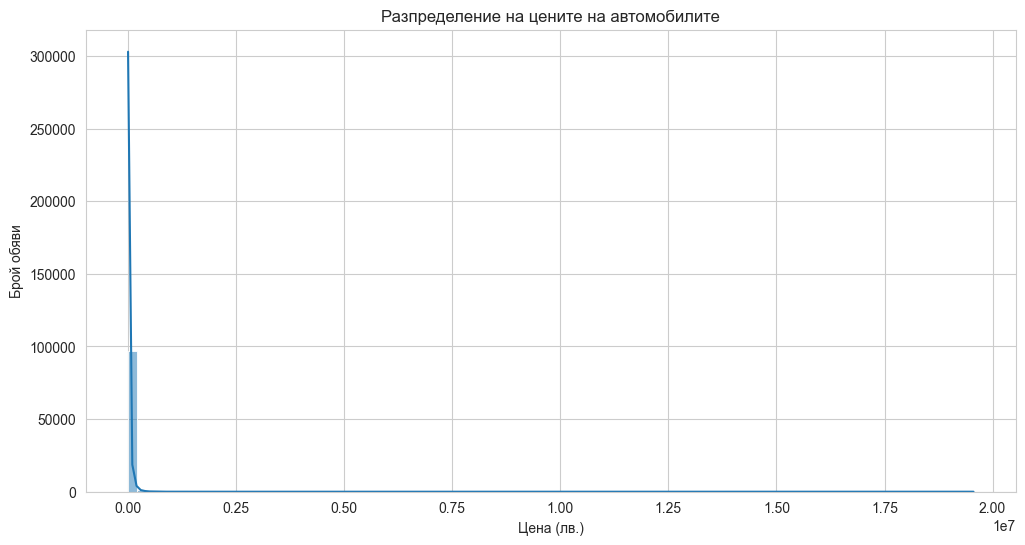

In [10]:
plt.figure(figsize=(12, 6))
plt.title('Разпределение на цените на автомобилите')
plt.xlabel('Цена (лв.)')
plt.ylabel('Брой обяви')
sns.histplot(numeric_prices, bins=100, kde=True)

Нека премахнем автомобилите с цена под 500 лева и над 150 000 лева, за да можем да видим по-детайлно разпределението на цените:

<Axes: title={'center': 'Разпределение на цените на автомобилите без аутлайъри'}, xlabel='Цена (лв.)', ylabel='Брой обяви'>

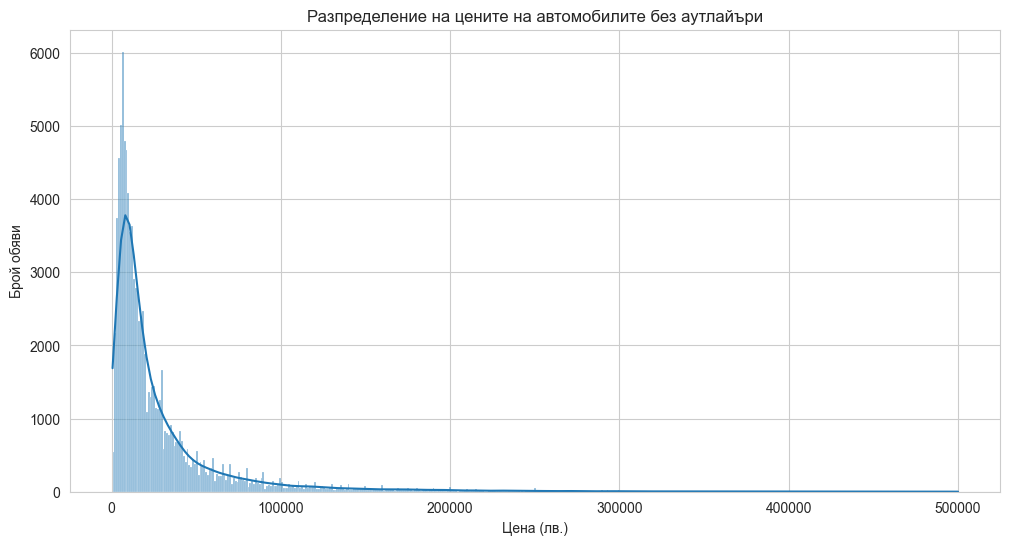

In [11]:
numeric_prices_no_outliers = numeric_prices[(numeric_prices >= 500) & (numeric_prices <= 500000)]

plt.figure(figsize=(12, 6))
plt.title('Разпределение на цените на автомобилите без аутлайъри')
plt.xlabel('Цена (лв.)')
plt.ylabel('Брой обяви')
sns.histplot(numeric_prices_no_outliers, kde=True)

Графиката потвърждава видяното в таблицата по-горе - мнозинството от автомобилите са на цена до 33 000 лева, а по-големите цени са рядкост и можем да ги изключим от набора за обучение на модела, тъй като те ще изкривят значително предсказанията му.

<Axes: title={'center': 'Разпределение на цените на автомобилите без аутлайъри'}, ylabel='Цена (лв.)'>

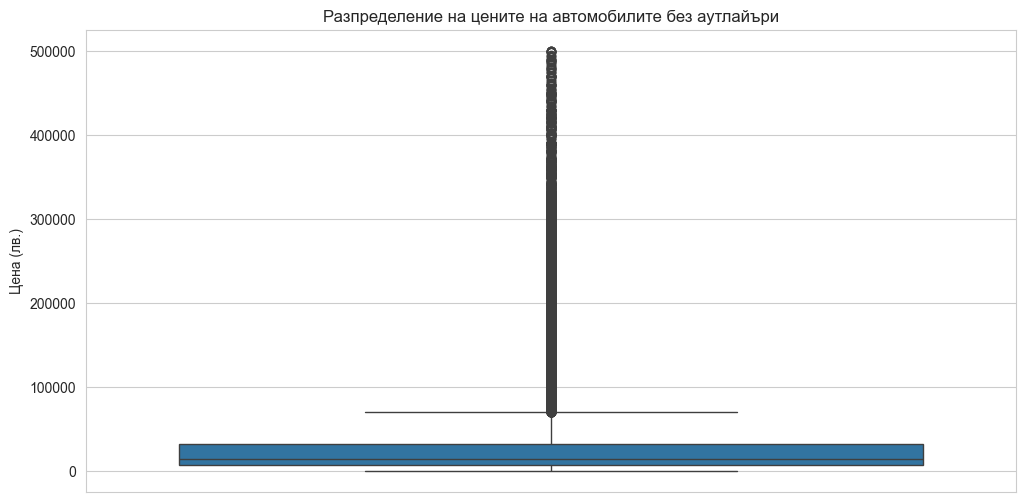

In [12]:
plt.figure(figsize=(12, 6))
plt.title('Разпределение на цените на автомобилите без аутлайъри')
plt.ylabel('Цена (лв.)')

sns.boxplot(numeric_prices_no_outliers)

Да видим колко празни стойности имаме в колоната `Price`:

In [13]:
prices.isna().sum()

np.int64(0)

За щастие, нямаме празни стойности в тази колона.

## Марка, модел, тип на купето

Да разгледаме как са разпределени марките и моделите на автомобилите в нашия набор от данни:

In [14]:
make_model_body = ['Make', 'Model', 'BodyType']

dataset[make_model_body].describe(include='all')

Make  Model BodyType
count           99693  99693    99693
unique            111   1401       11
top     Mercedes-Benz   Golf     Джип
freq            13678   2482    26169

Имаме данни за 112 марки и 1403 модела автомобили, като най-често срещаният производител е Mercedes-Benz, а най-често срещаният модел е Golf (Volkswagen). Типовете купета са 11 на брой, като най-популярен е джипът.

Ще бъде интересно да разгледаме дяловете на различните марки и модели в нашия набор от данни.

<Axes: title={'center': 'Брой на обявите за първите 15 марки автомобили'}, xlabel='Брой обяви', ylabel='Марка'>

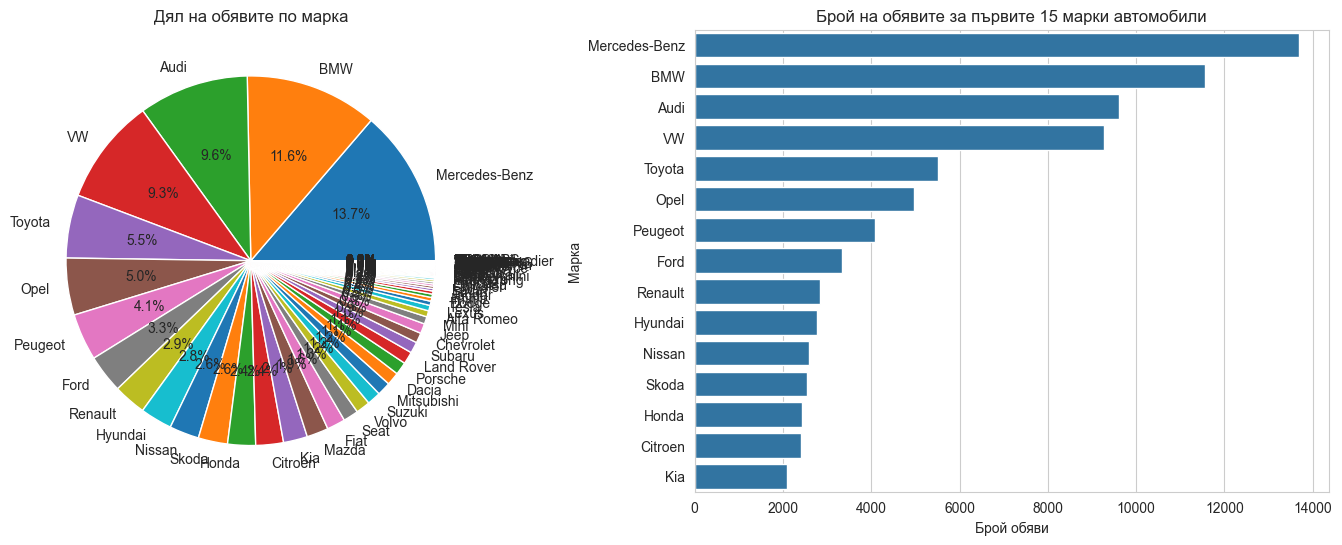

In [15]:
make_value_counts = dataset['Make'].value_counts()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title('Дял на обявите по марка')
plt.pie(make_value_counts, labels=make_value_counts.index, autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title('Брой на обявите за първите 15 марки автомобили')
plt.ylabel('Марка')
plt.xlabel('Брой обяви')
sns.barplot(x=make_value_counts.head(15).values, y=dataset['Make'].value_counts().head(15).index, orient='h')

Text(0, 0.5, 'Марка')

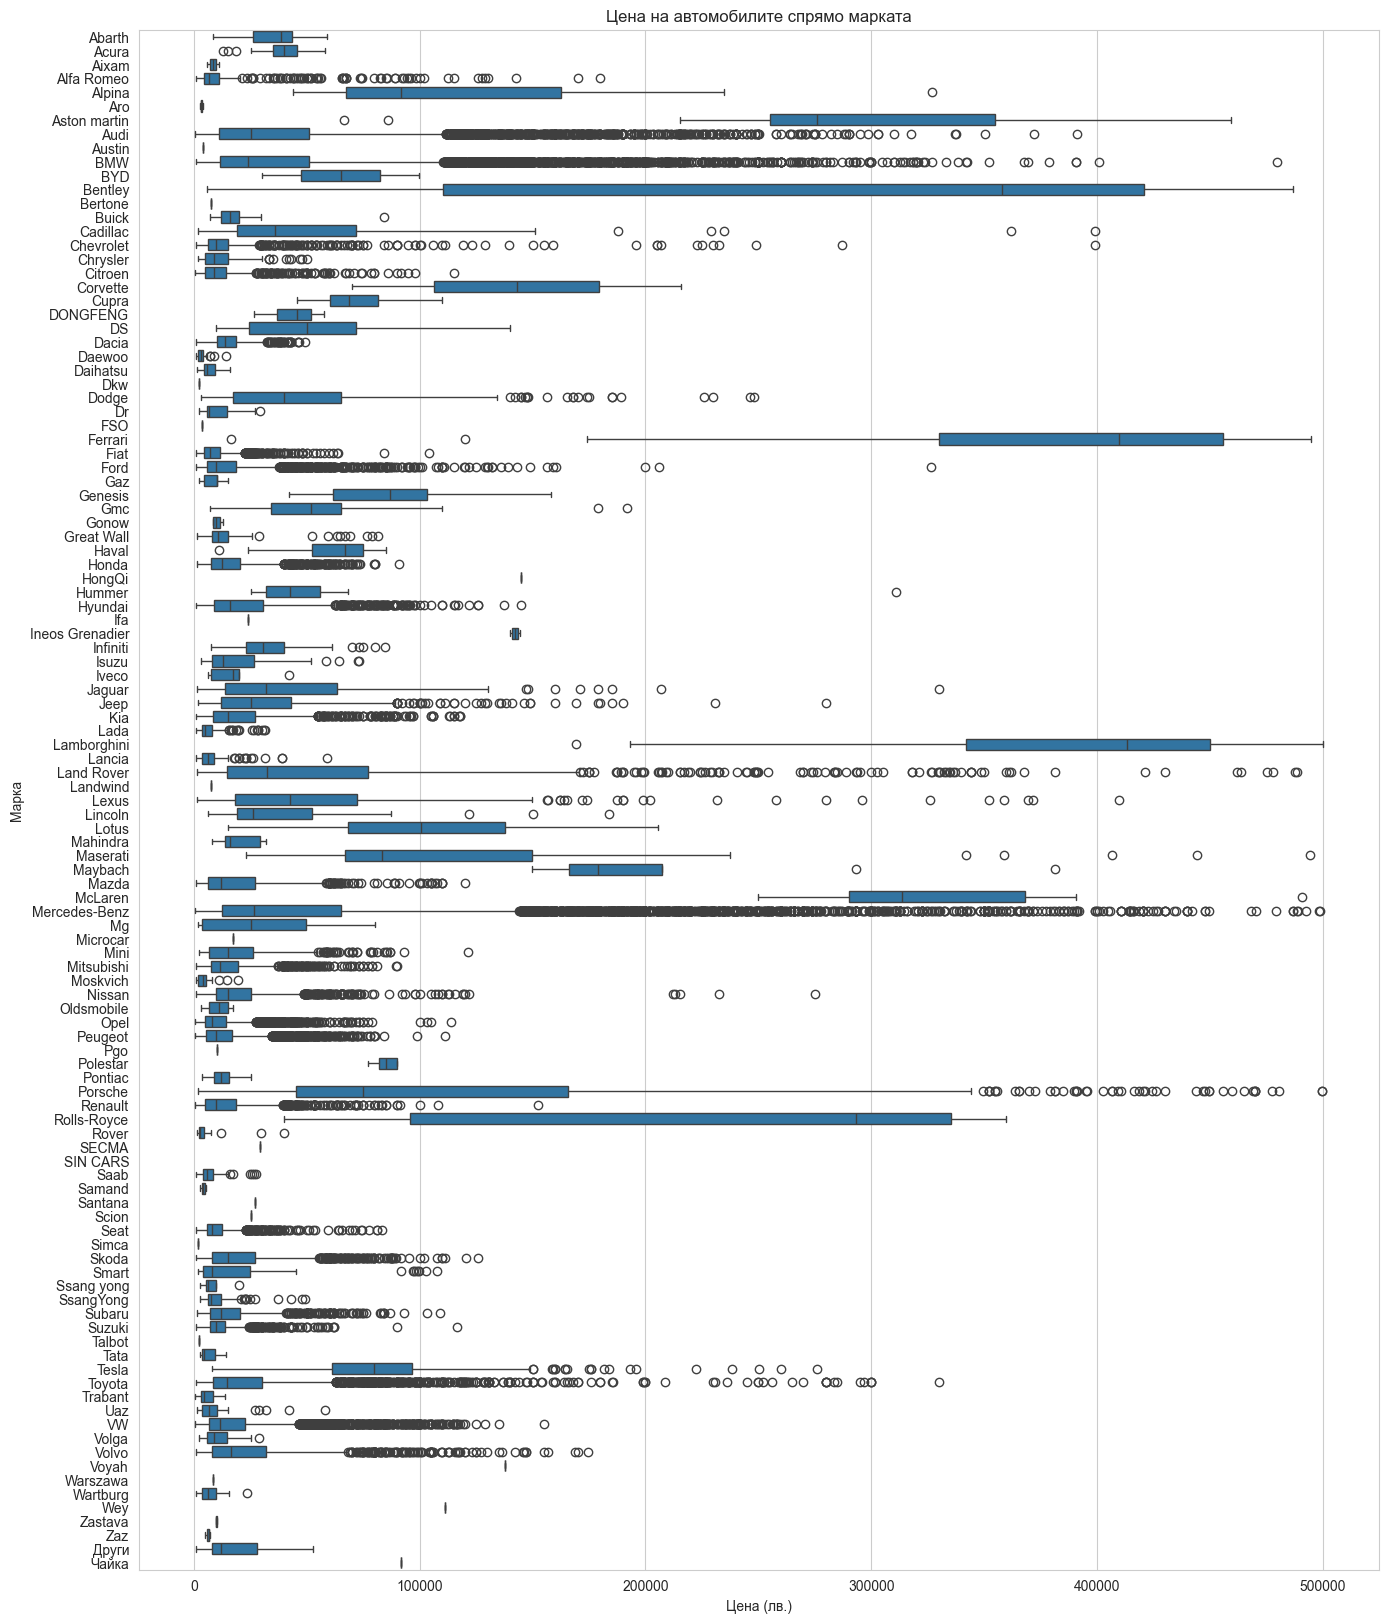

In [16]:
plt.figure(figsize=(16, 20))
sns.boxplot(data=dataset, y='Make', x=numeric_prices_no_outliers)
plt.title('Цена на автомобилите спрямо марката')
plt.xlabel('Цена (лв.)')
plt.ylabel('Марка')

За българските шофьори едва ли ще бъде изненада, че най-популярните марки автомобили у нас са немските производители на премиум автомобили - а именно Mercedes-Benz, BMW и Audi. Делът на тези 3 марки в нашия набор от данни е над 30%, което е впечатляващо. Близко след тях е друг немски производител - Volkswagen, който също е много популярен у нас. Останалите марки се задоволявят с доста по-малък дял от пазара, като те си поделят по около 1-2% от обявите.

Да видим как стоят нещата при моделите:

<Axes: title={'center': 'Брой обяви за първите 15 модели автомобили'}, xlabel='Брой обяви', ylabel='Модел'>

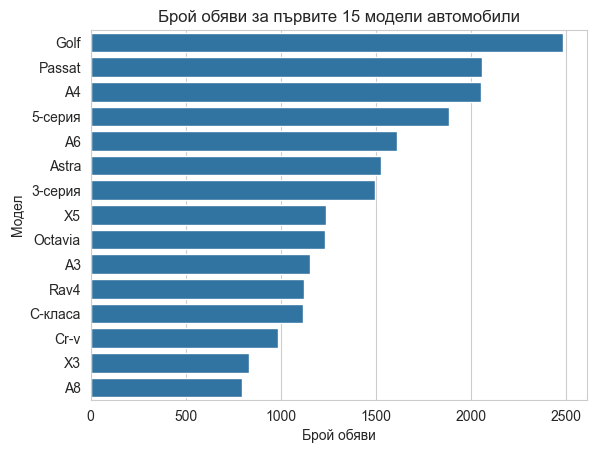

In [17]:
model_value_counts = dataset['Model'].value_counts()

plt.title('Брой обяви за първите 15 модели автомобили')
plt.ylabel('Модел')
plt.xlabel('Брой обяви')
sns.barplot(x=model_value_counts.head(15).values, y=dataset['Model'].value_counts().head(15).index, orient='h')

Тук ситуацията изглежда по-балансирана - най-популярен е Golf на Volkswagen, но не доминира съществено над останалите модели. Сред първите 15 модела се нареждат предимно модели на немските производители, но виждаме и такива на японските производители Toyota и Honda, както и на чешкия Skoda.

Нека проверим как се разпределят типовете купета:

([<matplotlib.patches.Wedge at 0x16af5a630>,
 [Text(0.7466912852642918, 0.8077450863424426, 'Джип'),
  Text(-0.7687021197045737, 0.7868272054026192, 'Хечбек'),
  Text(-0.9889633823156107, -0.48161335990487997, 'Седан'),
  Text(-0.022165787711739986, -1.099776649077038, 'Комби'),
  Text(0.6771516286658775, -0.8668711967732864, 'Купе'),
  Text(0.8910912016631467, -0.6449468740280315, 'Ван'),
  Text(1.0085516302820927, -0.4391168512541201, 'Миниван'),
  Text(1.061304680946568, -0.28919262473462887, 'Пикап'),
  Text(1.089742639964186, -0.1498698723689538, 'Стреч лимузина'),
  Text(1.0991964850863116, -0.04203673600433284, 'Кабрио'),
  Text(1.0999999994612943, -3.4426047563918826e-05, 'Линейка')],
 [Text(0.40728615559870457, 0.4405882289140595, '26.2%'),
  Text(-0.4192920652934038, 0.42917847567415585, '22.1%'),
  Text(-0.5394345721721512, -0.2626981963117527, '17.7%'),
  Text(-0.012090429660949082, -0.5998781722238389, '17.3%'),
  Text(0.3693554338177514, -0.47283883460361065, '4.5%'),
  T

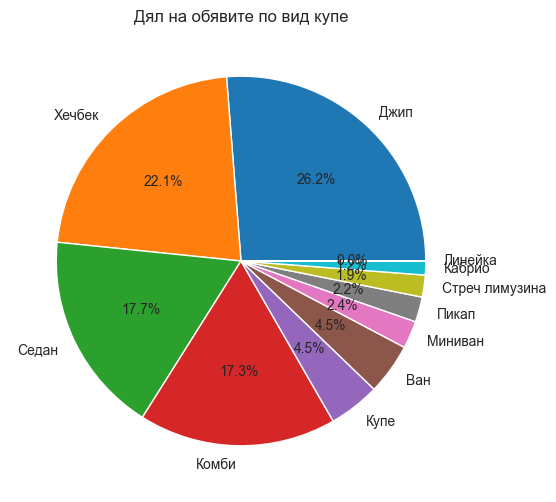

In [18]:
body_type_value_counts = dataset['BodyType'].value_counts()

plt.figure(figsize=(12, 6))
plt.title('Дял на обявите по вид купе')
plt.pie(body_type_value_counts, labels=body_type_value_counts.index, autopct='%1.1f%%')

Пазарът е относително равномерно разпределен между различните типове купета, като най-голям дял имат джиповете и хечбековете - общо почти половината от обявите са за тези два типа купета. След тях са седаните и комбитата, които също притежават значителен дял от пазара.

Да проверим дали имаме празни стойности в колоните `Make`,`Model` и `BodyType`:

In [19]:
dataset[make_model_body].isna().sum()

Make        0
Model       0
BodyType    0
dtype: int64

## Дата на производство

Нека проверим разпределението на автомобилите по тяхната година на производство:

In [20]:
dataset['ManufactureDate'].describe(include='all')

count       99535
unique        682
top       10/2008
freq          628
Name: ManufactureDate, dtype: object

In [21]:
years_of_manufacture = dataset['ManufactureDate'].dropna().str.split('/').str[1].astype(int)

years_of_manufacture.describe()

count   99535.00
mean     2010.75
std         7.03
min      1931.00
25%      2006.00
50%      2011.00
75%      2016.00
max      2024.00
Name: ManufactureDate, dtype: float64

<Axes: title={'center': 'Разпределение на автомобилите по година на производство'}, xlabel='Година на производство', ylabel='Брой обяви'>

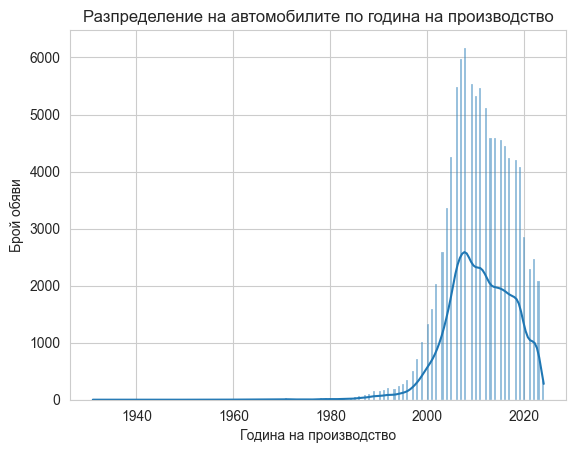

In [22]:
plt.title('Разпределение на автомобилите по година на производство')
plt.xlabel('Година на производство')
plt.ylabel('Брой обяви')

sns.histplot(years_of_manufacture, kde=True)

От таблицата и графиката е видно, че почти всички автомобили са произведени след 1990г., като най-голям брой от тях са произведени през новото хилядолетие. Най-старият автомобил в нашия набор от данни е произведен през 1931г. - по всяка вероятност това е класически автомобил, чиято цена едва ли ще бъде ниска, както би се очаквало от автомобил на голяма възраст. Нека го разгледаме:

In [23]:
boolean_mask = (years_of_manufacture == 1931)
boolean_mask.index = dataset.index[years_of_manufacture.index]

dataset.dropna(subset='ManufactureDate').loc[boolean_mask]

Make    Model BodyType ManufactureDate  FuelType Transmission  \
31825  Ford  Mustang   Кабрио         08/1931  Бензинов        Ръчна   

       EngineSize  Horsepower EuroStandard  Mileage  ...  ComfortFeatures  \
31825         NaN       40.00          NaN 30000.00  ...              NaN   

       OtherFeatures ExteriorFeatures SecurityFeatures InteriorFeatures  \
31825            NaN              NaN              NaN              NaN   

      SpecialisedFeatures   Region         City ViewCount  \
31825                 NaN  Пловдив  гр. Пловдив     13113   

                      OfferTitle  
31825  Ford Mustang Ford model A  

[1 rows x 26 columns]

Всъщност изглежда, че тази обява съдържа грешна информация, тъй като моделът е записан като Mustang, което не е възможно, тъй като моделът Мustang влиза в прозиводство едва през 1964г. Тази и подобни обяви ще трябва да бъдат премахнати от набора от данни, тъй като те могат да изкривят резултатите на модела.

Сега нека проверим как годината на производство влияе на цената на един автомобил: 

<Axes: title={'center': 'Цена на автомобилите спрямо годината на производство'}, xlabel='Цена (лв.)', ylabel='Година на производство'>

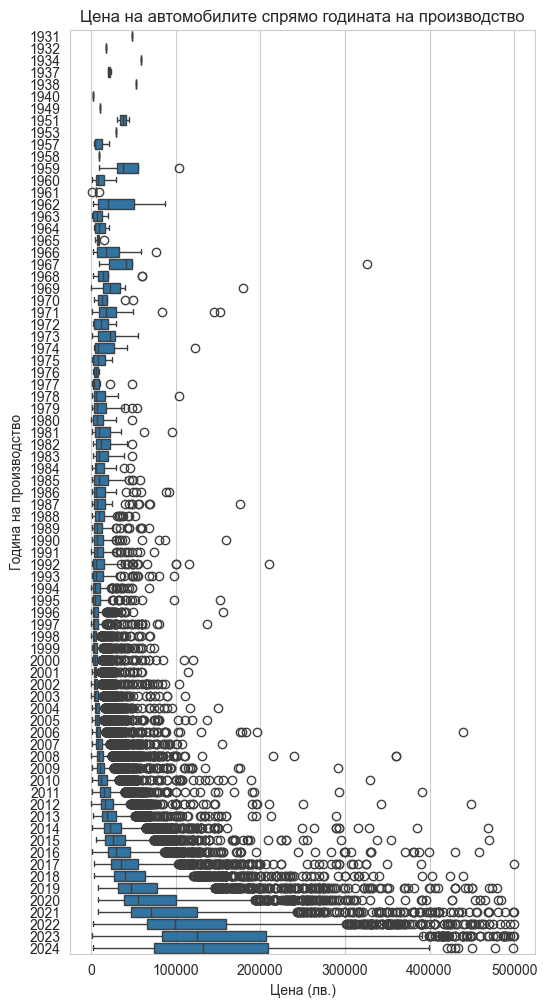

In [24]:
# Ensure numeric_prices_no_outliers and years_of_manufacture have the same length
valid_indices = numeric_prices_no_outliers.index.intersection(years_of_manufacture.index)

# Filter dataset to include only valid rows
filtered_dataset = dataset.loc[valid_indices]
filtered_prices = numeric_prices_no_outliers.loc[valid_indices]
filtered_years = years_of_manufacture.loc[valid_indices]

plt.figure(figsize=(6, 12))
plt.title('Цена на автомобилите спрямо годината на производство')
plt.xlabel('Цена (лв.)')
plt.ylabel('Година на производство')
sns.boxplot(x=filtered_prices, y=filtered_years, orient='h')

Наблюдават се няколко интересни тенденции:
- 1951 - 1998г. - Средната цена на автомобилите по-скоро намалява с годините, с изключения в някои години. Това може би се дължи на факта, че автомобилите произведени в началото на този период са придобили колекционерска стойност, тъй като се срещат все по-рядко поради тяхната възраст, а тези от по-късния период все още се срещат често по пътищата и възрастта им по-скоро влияе негативно на цената им.
- 1998 - 2024г. - В този период средната цена на автомобилите нараства с годините, като от 2010г. нататък тази тенденция става все по-ясно изразена.

## За двигатели

Да разгледаме наличните данни за двигателите в автомобилите:

In [25]:
dataset.columns

Index(['Make', 'Model', 'BodyType', 'ManufactureDate', 'FuelType',
       'Transmission', 'EngineSize', 'Horsepower', 'EuroStandard', 'Mileage',
       'MilesPerFullCharge (EV)', 'BatteryCapacity (EV)', 'Color', 'VIN',
       'Price', 'SafetyFeatures', 'ComfortFeatures', 'OtherFeatures',
       'ExteriorFeatures', 'SecurityFeatures', 'InteriorFeatures',
       'SpecialisedFeatures', 'Region', 'City', 'ViewCount', 'OfferTitle'],
      dtype='object')

Двигателите на автомобилите се описват от следните колони:
- `EngineSize` - обем на двигателя в кубични сантиметри
- `FuelType` - тип на горивото
- `Horsepower` - мощност на двигателя в конски сили
- `EuroStandard` - евро категория на двигателя

In [26]:
engine_columns = ['EngineSize', 'FuelType', 'Horsepower', 'EuroStandard']

dataset[engine_columns].describe(include='all')

EngineSize FuelType  Horsepower EuroStandard
count     73390.00    99693    94274.00        77655
unique         NaN        5         NaN            6
top            NaN  Дизелов         NaN       Евро 6
freq           NaN    54090         NaN        27057
mean       2216.35      NaN      186.93          NaN
std        1433.42      NaN      125.41          NaN
min           1.00      NaN        1.00          NaN
25%        1600.00      NaN      110.00          NaN
50%        2000.00      NaN      150.00          NaN
75%        2500.00      NaN      224.00          NaN
max       62000.00      NaN     2400.00          NaN

[Text(0.5, 0, 'Обем на двигателя (куб. см.)'), Text(0, 0.5, 'Цена (лв.)')]

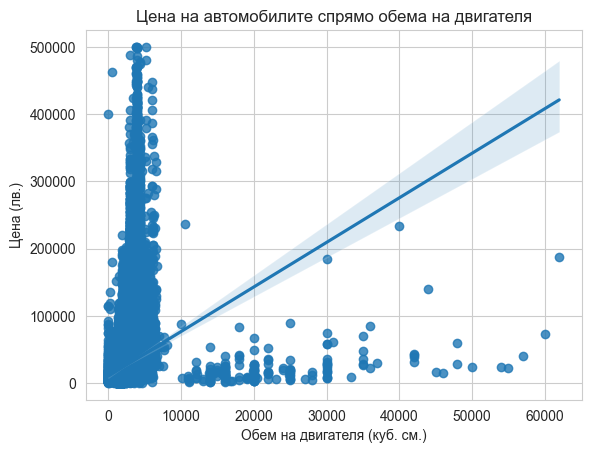

In [27]:
valid_indices = numeric_prices_no_outliers.index.intersection(dataset['EngineSize'].dropna().index)
filtered_dataset = dataset.loc[valid_indices]
filtered_prices = numeric_prices_no_outliers.loc[valid_indices]

plt.title('Цена на автомобилите спрямо обема на двигателя')
ax = sns.regplot(data=filtered_dataset, x='EngineSize', y=filtered_prices)
ax.set(xlabel='Обем на двигателя (куб. см.)', ylabel='Цена (лв.)')

Обем на двигателя над 10 000 куб. см. изглежда като аномалия и не е възможно да има толкова много автомобили с толкова големи двигатели. Нека разгледаме тези записи:

In [28]:
dataset[dataset['EngineSize'] > 10000].sample(15)

Make           Model BodyType ManufactureDate  FuelType  \
10150           Audi             SQ8     Джип         05/2021   Дизелов   
38637           Jeep  Grand cherokee     Джип         03/1997   Дизелов   
75652        Renault          Megane   Хечбек         01/2024  Бензинов   
68002           Opel          Zafira      Ван         06/2005   Дизелов   
12539            BMW             316     Купе         01/2002  Бензинов   
3136            Audi              A4    Комби         10/2008   Дизелов   
82968         Suzuki          Vitara     Джип         03/1992  Бензинов   
45460  Mercedes-Benz             124     Купе         09/1991  Бензинов   
65725           Opel           Corsa   Хечбек         05/2002  Бензинов   
15437            BMW         5-серия    Седан         08/2005   Дизелов   
95463             VW            Polo   Хечбек         01/2006   Дизелов   
41925     Land Rover       Discovery     Джип         08/2015   Дизелов   
54111  Mercedes-Benz        GL-класа     Джип         01/2015  Бензинов   
31688           Ford          Mondeo    Седан         04/2003   Дизелов   
85092         Toyota            C-HR   Хечбек         01/2020  Хибриден   

      Transmission  EngineSize  Horsepower EuroStandard   Mileage  ...  \
10150  Автоматична    40000.00      435.00       Евро 6   9821.00  ...   
38637        Ръчна    25000.00      116.00       Евро 2 230000.00  ...   
75652  Автоматична    18000.00      300.00          NaN       NaN  ...   
68002        Ръчна    20000.00      100.00          NaN 250000.00  ...   
12539        Ръчна    16000.00      114.00       Евро 4 240000.00  ...   
3136   Автоматична    15999.00      239.00       Евро 4 219000.00  ...   
82968        Ръчна    16000.00       82.00       Евро 1 187000.00  ...   
45460        Ръчна    23000.00      136.00       Евро 1 378000.00  ...   
65725        Ръчна    16800.00       75.00       Евро 4 168000.00  ...   
15437  Автоматична    30000.00      218.00       Евро 4 234000.00  ...   
95463        Ръчна    19001.00       70.00       Евро 4 181500.00  ...   
41925  Автоматична    22000.00      150.00       Евро 5 200000.00  ...   
54111  Автоматична    60000.00      585.00       Евро 5 176000.00  ...   
31688  Автоматична    20000.00      131.00       Евро 3 160000.00  ...   
85092  Автоматична    18000.00      122.00       Евро 6  67000.00  ...   

                                         ComfortFeatures  \
10150  Auto Start Stop function, Bluetooth \ handsfre...   
38637  Бързи \ бавни скорости, Ел. Огледала, Ел. Стък...   
75652  Auto Start Stop function, Bluetooth \ handsfre...   
68002                                                NaN   
12539                                                NaN   
3136   Steptronic, Tiptronic, USB, audio\video, IN\AU...   
82968                                                NaN   
45460  Ел. Огледала, Ел. Стъкла, Подгряване на седалк...   
65725  Бордкомпютър, Ел. Огледала, Ел. Стъкла, Климат...   
15437                                                NaN   
95463  Бордкомпютър, Ел. Огледала, Ел. Стъкла, Климат...   
41925  Auto Start Stop function, Bluetooth \ handsfre...   
54111  Auto Start Stop function, Bluetooth \ handsfre...   
31688  DVD, TV, USB, audio\video, IN\AUX изводи, Борд...   
85092  Auto Start Stop function, Bluetooth \ handsfre...   

                                           OtherFeatures  \
10150      4x4, Нов внос, С регистрация, Сервизна книжка   
38637   4x4, Дълга база, Напълно обслужен, С регистрация   
75652                                   Buy back, Лизинг   
68002                                                NaN   
12539                                                NaN   
3136        4x4, Buy back, Бартер, Лизинг, С регистрация   
82968                                                NaN   
45460                                                NaN   
65725                                           Нов внос   
15437                                                NaN   
95463   Н

Изглежда, че тези записи съдържат грешни данни - при попълването на обема е добавена допълнителна нула. Тези записи ще трябва да бъдат поправени преди да ги използваме за обучение.

Да видим отново графиката като премахнем аномалиите:

[Text(0.5, 0, 'Обем на двигателя (куб. см.)'), Text(0, 0.5, 'Цена (лв.)')]

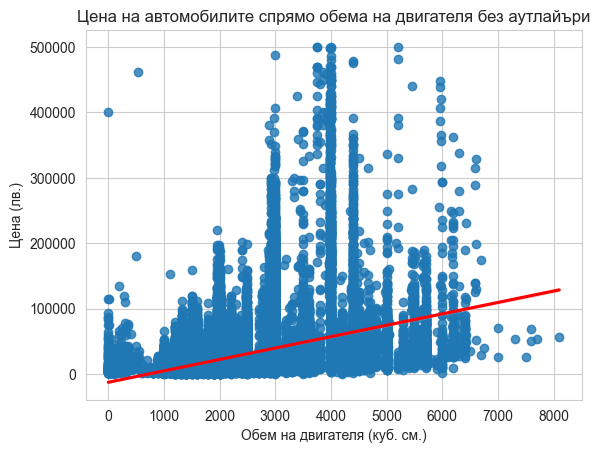

In [29]:
filtered_dataset = filtered_dataset[filtered_dataset['EngineSize'] < 10000]
filtered_prices = numeric_prices_no_outliers.loc[filtered_dataset.index]

plt.title('Цена на автомобилите спрямо обема на двигателя без аутлайъри')
ax = sns.regplot(data=filtered_dataset, x='EngineSize', y=filtered_prices, line_kws={'color': 'red'})
ax.set(xlabel='Обем на двигателя (куб. см.)', ylabel='Цена (лв.)')

Едва ли е изненадващо, че по-големият обем на двигателя води до по-висока цена на автомобила. По-големите двигатели обикновено са и по-мощни, което също води до по-висока цена.

[Text(0.5, 0, 'Мощност на двигателя (к.с.)'), Text(0, 0.5, 'Цена (лв.)')]

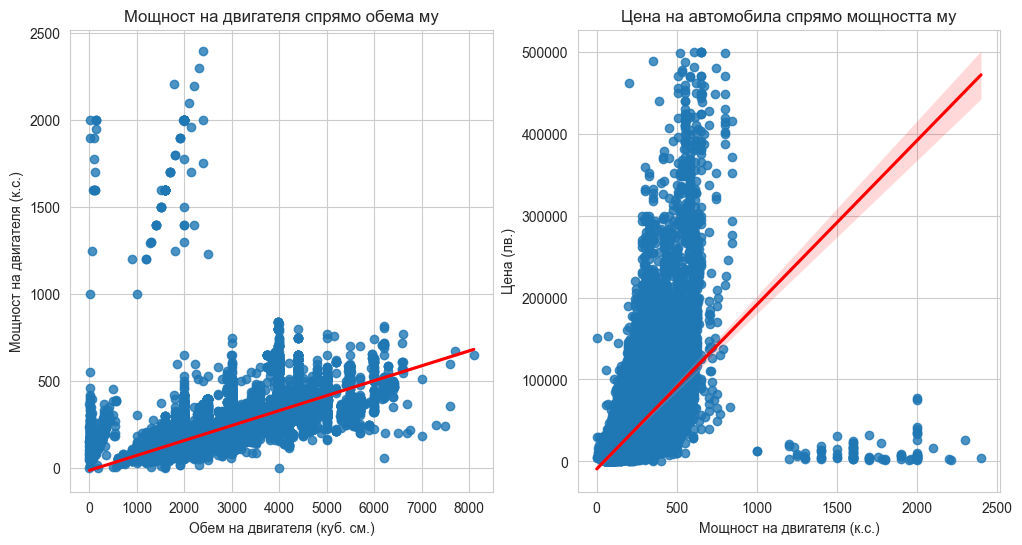

In [30]:
filtered_prices = numeric_prices_no_outliers.loc[filtered_dataset.index]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Мощност на двигателя спрямо обема му')
ax = sns.regplot(data=filtered_dataset, x='EngineSize', y='Horsepower', line_kws={'color': 'red'})
ax.set(xlabel='Обем на двигателя (куб. см.)', ylabel='Мощност на двигателя (к.с.)')

plt.subplot(1, 2, 2)
plt.title('Цена на автомобила спрямо мощността му')
ax = sns.regplot(data=filtered_dataset, x='Horsepower', y=filtered_prices, line_kws={'color': 'red'})
ax.set(xlabel='Мощност на двигателя (к.с.)', ylabel='Цена (лв.)')

При мощността на двигателя също намираме аътлайъри - автомобили с мощност над 1000 конски сили. Тези записи едва ли са грешни - тези стойности е напълно възможно да бъдат достигнати от силно модифицирани или спортни автомобили. Нека разгледаме тези записи:

In [31]:
dataset[dataset['Horsepower'] > 1000].sample(15)

Make          Model        BodyType ManufactureDate  \
85099         Toyota           C-HR          Хечбек         03/2017   
90567             VW           Golf            Купе         07/1990   
97998             VW         Touran             Ван         12/2016   
71481        Peugeot            407           Комби         08/2004   
83412          Tesla        Model X            Джип         08/2023   
83362          Tesla        Model S  Стреч лимузина         07/2022   
74921        Renault         Kangoo           Пикап         06/1996   
35201        Hyundai            I10          Хечбек         04/2022   
25403        Citroen  Xsara picasso             Ван         11/2005   
83337          Tesla        Model S           Седан         07/2023   
95127             VW         Passat           Седан         09/2005   
43488          Mazda              2           Комби         08/2003   
76750           Seat       Alhambra             Ван         06/2006   
53721  Mercedes-Benz        G-класа            Джип         03/1988   
70232        Peugeot            307           Комби         01/2003   

           FuelType Transmission  EngineSize  Horsepower EuroStandard  \
85099      Хибриден  Автоматична         NaN     1500.00       Евро 6   
90567      Бензинов        Ръчна         NaN     1300.00       Евро 3   
97998       Дизелов        Ръчна     1600.00     1600.00       Евро 6   
71481       Дизелов        Ръчна     2000.00     1300.00          NaN   
83412  Електрически  Автоматична         NaN     1020.00       Евро 6   
83362  Електрически  Автоматична         NaN     1020.00       Евро 6   
74921      Бензинов        Ръчна         NaN     1200.00          NaN   
35201      Бензинов        Ръчна         NaN     1197.00       Евро 6   
25403      Бензинов        Ръчна       90.00     1600.00       Евро 4   
83337  Електрически  Автоматична         NaN     1020.00       Евро 6   
95127       Дизелов        Ръчна     2000.00     2000.00       Евро 4   
43488       Дизелов        Ръчна     1600.00     1600.00       Евро 3   
76750       Дизелов        Ръчна         NaN     1900.00       Евро 3   
53721      Бензинов  Автоматична     2300.00     2300.00          NaN   
70232       Дизелов        Ръчна         NaN     1950.00       Евро 3   

        Mileage  ...                                    ComfortFeatures  \
85099  59500.00  ...  Auto Start Stop function, Bluetooth \ handsfre...   
90567 223000.00  ...                                                NaN   
97998 136000.00  ...  Auto Start Stop function, Bluetooth \ handsfre...   
71481 382000.00  ...              Ел. Огледала, Ел. Стъкла, Климатроник   
83412     10.00  ...  Auto Start Stop function, Bluetooth \ handsfre...   
83362  11109.00  ...  Auto Start Stop function, Bluetooth \ handsfre...   
74921 200000.00  ...                                                NaN   
35201  50000.00  ...  Ел. Стъкла, Климатик, Мултифункционален волан,...   
25403 250000.00  ...                                        Климатроник   
83337   5900.00  ...  Bluetooth \ handsfree система, DVD, TV, Steptr...   
95127 317000.00  ...  Bluetooth \ handsfree система, DVD, TV, USB, a...   
43488 263000.00  ...                                                NaN   
76750 216000.00  ...  Бордкомпютър, Ел. Стъкла, Климатроник, Навигац...   
53721  15000.00  ...                                                NaN   
70232 180000.00  ...                                         Ел. Стъкла   

                                           OtherFeatures  \
85099   Напълно обслужен, С регистрация, Сервизна книжка   
90567                                                NaN   
97998         7 места, Лизинг, Нов внос, Сервизна книжка   
71481                                      С регистрация   
83412     4x4, Лизинг, Напълно обслужен, Сервизна книжка   
83362   4x4, Напълно обслужен, Нов внос, Сервизна книжка   
74921                                                NaN   
35201                        

Всъщност виждаме, че тези стойности са грешни - по-голямата част от тях съответстват на обем на двигателя (1600, 1800, 2000 и т.н.). На някой места обемът на двигателя е записан като мощност, а на други обратното. Тези записи ще трябва да бъдат поправени преди да ги използваме за обучение.

Да погледнем отново графиката, като премахнем аутлайърите:

[Text(0.5, 0, 'Мощност на двигателя (к.с.)'), Text(0, 0.5, 'Цена (лв.)')]

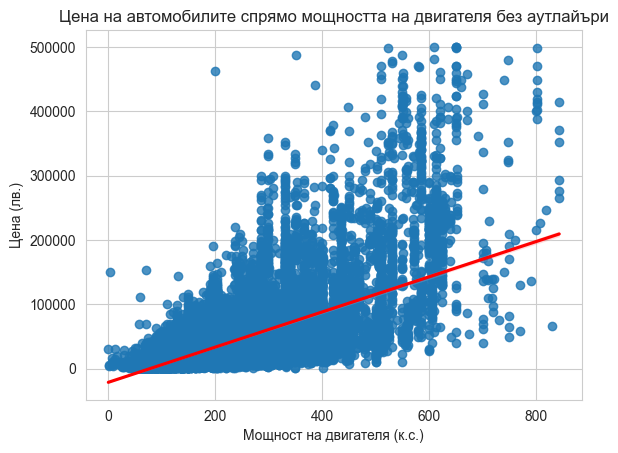

In [32]:
filtered_dataset = filtered_dataset[filtered_dataset['Horsepower'] < 1000]
filtered_prices = numeric_prices_no_outliers.loc[filtered_dataset.index]

plt.title('Цена на автомобилите спрямо мощността на двигателя без аутлайъри')
ax = sns.regplot(data=filtered_dataset, x='Horsepower', y=filtered_prices, line_kws={'color': 'red'})
ax.set(xlabel='Мощност на двигателя (к.с.)', ylabel='Цена (лв.)')

Връзката е очевидна - по-мощните автомобили са по-скъпи.

Да видим как са разпределени различните типове гориво:

([<matplotlib.patches.Wedge at 0x16b8ad220>,
 [Text(-0.14665854236841963, 1.0901794677714172, 'Дизелов'),
  Text(-0.011802529119676964, -1.0999366801349881, 'Бензинов'),
  Text(1.0738665359687392, -0.2383498750293376, 'Електрически'),
  Text(1.095597699682819, -0.09831419251418252, 'Хибриден'),
  Text(1.0998672565255125, -0.01708853484189902, 'Plug-in хибрид')],
 [Text(-0.07999556856459251, 0.5946433460571366, '54.3%'),
  Text(-0.006437743156187434, -0.5999654618918117, '41.1%'),
  Text(0.5857453832556758, -0.13000902274327503, '2.2%'),
  Text(0.5975987452815376, -0.0536259231895541, '1.9%'),
  Text(0.5999275944684613, -0.009321019004672193, '0.5%')])

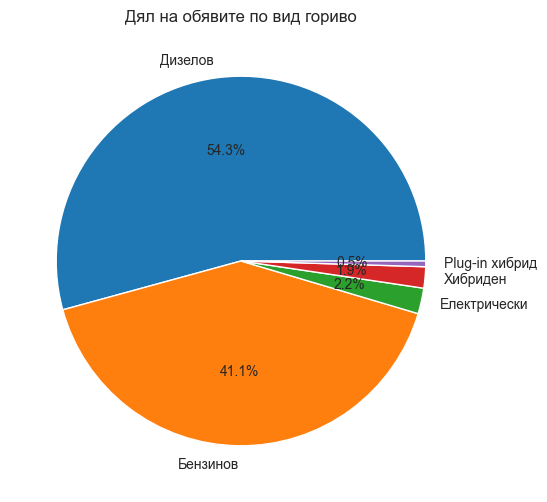

In [33]:
fuel_type_value_counts = dataset['FuelType'].value_counts()

plt.figure(figsize=(12, 6))
plt.title('Дял на обявите по вид гориво')
plt.pie(fuel_type_value_counts, labels=fuel_type_value_counts.index, autopct='%1.1f%%')

В България най-популярни са дизеловите автомобили като те доминират пазара - над половината от автомобилите са дизелови. Бензиновите автомобили също са популярни. Електрическите и хибридните автомобили са много редки у нас, като техния дял е общо около 3%.

<Axes: title={'center': 'Цени на автомобилите спрямо вида на горивото'}, xlabel='Вид на горивото', ylabel='Цена (лв.)'>

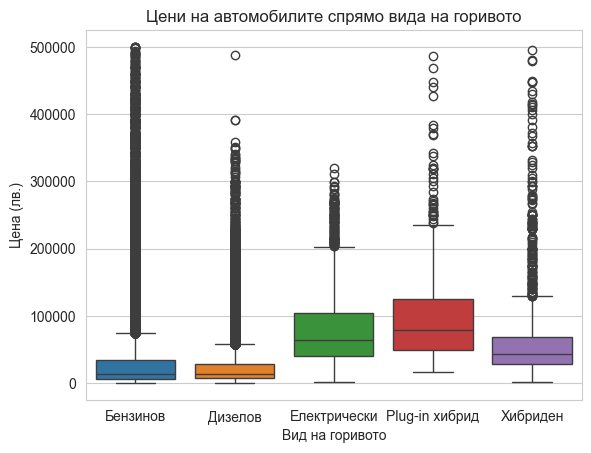

In [34]:
filtered_dataset = dataset.copy()
filtered_prices = numeric_prices_no_outliers.index.intersection(filtered_dataset.index)

filtered_dataset = filtered_dataset.loc[filtered_prices]
filtered_prices = numeric_prices_no_outliers.loc[filtered_prices]

plt.title('Цени на автомобилите спрямо вида на горивото')
plt.xlabel('Вид на горивото')
plt.ylabel('Цена (лв.)')
sns.boxplot(data=filtered_dataset, x='FuelType', y=filtered_prices, hue='FuelType')

По отношение на цената разбираме, че дизеловите и бензиновите автомобили са на сродни цени. Малко по-скъпи от тях са хибридите, последвани от електрическите такива. Най-скъпи са Plug-in хибридите.

([<matplotlib.patches.Wedge at 0x16a585fd0>,
 [Text(0.504230820638965, 0.9776253267575243, 'Евро 6'),
  Text(-1.0959985763385405, 0.09373964296866542, 'Евро 4'),
  Text(0.06540012141825556, -1.098054108010383, 'Евро 5'),
  Text(1.0048998630774775, -0.44741062256820324, 'Евро 3'),
  Text(1.0914882647918525, -0.1365773327520744, 'Евро 2'),
  Text(1.0992480861536915, -0.0406650351954427, 'Евро 1')],
 [Text(0.27503499307579904, 0.5332501782313769, '34.8%'),
  Text(-0.5978174052755675, 0.05113071434654477, '27.6%'),
  Text(0.03567279350086666, -0.5989386043692997, '27.0%'),
  Text(0.5481271980422604, -0.24404215776447447, '7.8%'),
  Text(0.5953572353410104, -0.07449672695567694, '1.6%'),
  Text(0.5995898651747408, -0.022180928288423288, '1.2%')])

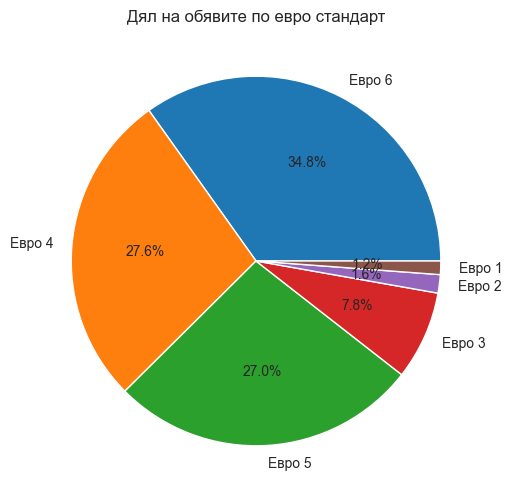

In [35]:
euro_standard_value_counts = dataset['EuroStandard'].value_counts()

plt.figure(figsize=(12, 6))
plt.title('Дял на обявите по евро стандарт')
plt.pie(euro_standard_value_counts, labels=euro_standard_value_counts.index, autopct='%1.1f%%')

Интересно е, че над 1/3 от колите са с категория Евро 6 - най-високата еко категория. На второто място е Евро 4, а много близо зад нея е Евро 5. Останалите категории не са много предлагани, от една страна, защото автомобилите от тези категории са вече доста стари, но и защото тези категории са обвързани с по-високи данъци и такси, което ги прави по-малко привлекателни за покупка. 

<Axes: title={'center': 'Цена на автомобилите спрямо евро стандарта на двигателя'}, xlabel='Евро стандарт', ylabel='Цена (лв.)'>

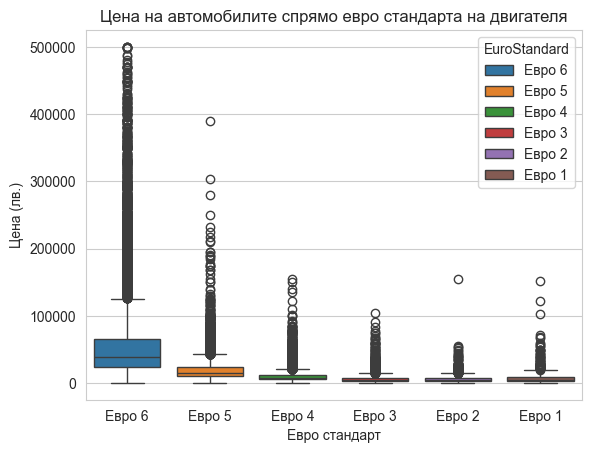

In [36]:
valid_indices = numeric_prices_no_outliers.index.intersection(dataset[engine_columns].dropna().index)

# Filter dataset to include only valid rows
filtered_dataset = dataset.loc[valid_indices]
filtered_prices = numeric_prices_no_outliers.loc[valid_indices]

plt.title('Цена на автомобилите спрямо евро стандарта на двигателя')
plt.xlabel('Евро стандарт')
plt.ylabel('Цена (лв.)')
sns.boxplot(data=filtered_dataset, x='EuroStandard', y=numeric_prices_no_outliers, hue='EuroStandard')

Наблюдения:
- `Евро 1, 2, 3` - Няма особена разлика в средната цена на автомобилите от тези категории, като те са доста по-евтини от останалите
- `Евро 4, 5` - Средната цена на автомобилите от тези категории е малко по-висока спрямо предходните категории 1, 2 и 3, но по-ниска от тези от категориите 6
- `Евро 6` - Ценовият диапазон е доста по-голям от този на останалите категории

## Данни за електрически автомобили

Имаме и няколко колони съдържащи информация само за електрически автомобили - колоните `MilesPerFullCharge (EV)` (пробег на електрически автомобили с едно зареждане) и `BatteryCapacity (EV)` (капацитет на батерията на електрически автомобили). Да разгледаме тези данни:

In [37]:
ev_columns = ['MilesPerFullCharge (EV)', 'BatteryCapacity (EV)']

dataset[ev_columns].describe(include='all')

MilesPerFullCharge (EV)  BatteryCapacity (EV)
count                  2713.00               2713.00
mean                    329.47                 57.55
std                     199.09                102.51
min                       1.00                  1.00
25%                     150.00                 25.60
50%                     350.00                 52.00
75%                     470.00                 81.00
max                    3100.00               5000.00

Веднага виждаме, че имаме много празни стойности в тези колони, тъй като, както вече видяхме, електрическите автомобили са слабо представени в нашия набор от данни. Да видим колко са те:

In [38]:
dataset[ev_columns].isna().sum()

MilesPerFullCharge (EV)    96980
BatteryCapacity (EV)       96980
dtype: int64

Отново, както и при по-горе разгледаните колони, се виждат стойности, които са много високи/ниски и вероятно са грешни данни. Нека разгледаме разпределението на стойностите в тези колони:

<Axes: title={'center': 'Разпределение на пробега на електрически автомобили с едно зареждане и капацитета на батерията'}>

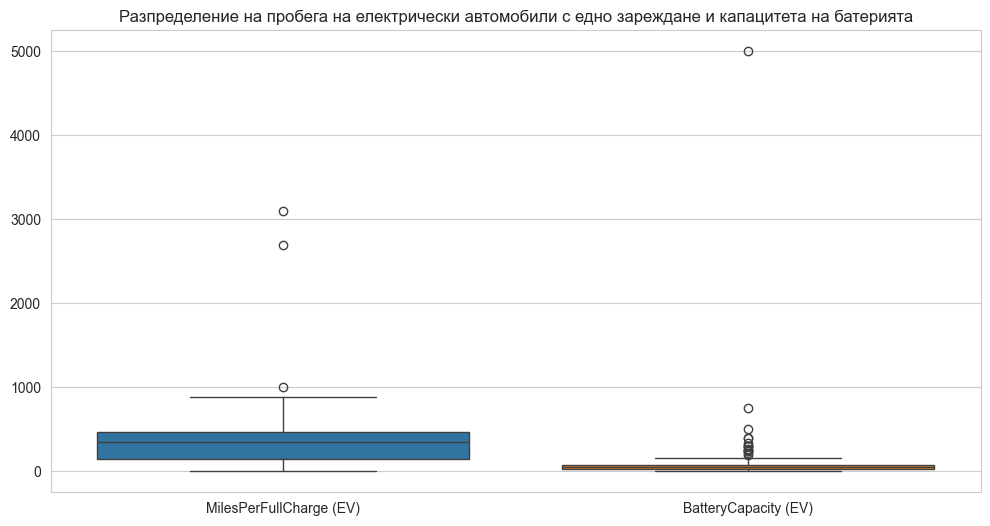

In [39]:
miles_per_full_charge = dataset['MilesPerFullCharge (EV)'].dropna().astype(float)
battery_capacity = dataset['BatteryCapacity (EV)'].dropna().astype(float)

plt.figure(figsize=(12, 6))
plt.title('Разпределение на пробега на електрически автомобили с едно зареждане и капацитета на батерията')
sns.boxplot(data=pd.DataFrame({'MilesPerFullCharge (EV)': miles_per_full_charge, 'BatteryCapacity (EV)': battery_capacity}))

Добра новина е, че тук аутлайрите изглежда са доста малко на брой. Нека все пак разгледаме някои:

In [40]:
dataset[dataset['MilesPerFullCharge (EV)'] > 1000].head()

Make    Model BodyType ManufactureDate      FuelType  \
53370  Mercedes-Benz  E-класа   Хечбек         04/2005  Електрически   
59181           Mini   Cooper     Купе         11/2020  Електрически   

      Transmission  EngineSize  Horsepower EuroStandard   Mileage  ...  \
53370  Автоматична         NaN      200.00          NaN 275000.00  ...   
59181  Автоматична         NaN         NaN          NaN  31200.00  ...   

                                         ComfortFeatures    OtherFeatures  \
53370                                                NaN              NaN   
59181  Bluetooth \ handsfree система, Steptronic, Tip...  Сервизна книжка   

                                        ExteriorFeatures  \
53370                                                NaN   
59181  2(3) Врати, LED фарове, Ксенонови фарове, Лети...   

           SecurityFeatures InteriorFeatures SpecialisedFeatures    Region  \
53370                   NaN              NaN                 NaN  Кърджали   
59181  Централно заключване      Кожен салон                 NaN     София   

               City ViewCount  \
53370  гр. Кърджали        70   
59181     гр. София      1496   

                                              OfferTitle  
53370  Mercedes-Benz E 270 T?rk?e biliyorum.  NERAZB?...  
59181                                     Mini Cooper SE  

[2 rows x 26 columns]

При тези автомобили е трудно да се определи от какво е предизвикана грешката, но със сигурност тези стойности са грешни. Понеже тези записи са едва 2 на брой, бихме могли просто да ги премахнем от набора от данни.

In [41]:
dataset[dataset['BatteryCapacity (EV)'] > 150].sample(15)

Make    Model BodyType ManufactureDate        FuelType  \
34897         Hummer       H1    Пикап         09/2023    Електрически   
83415          Tesla  Model X     Джип         09/2017    Електрически   
53552  Mercedes-Benz      EQS     Джип         12/2022    Електрически   
73644        Porsche   Taycan    Комби         12/2022    Електрически   
8484            Audi       Q7     Джип         01/2021  Plug-in хибрид   
72826        Porsche  Cayenne     Джип         01/2021  Plug-in хибрид   
53529  Mercedes-Benz      EQS     Джип         02/2023    Електрически   
53534  Mercedes-Benz      EQS     Джип         04/2023    Електрически   
45879  Mercedes-Benz    A 170   Хечбек         05/2000    Електрически   
7620            Audi   E-Tron     Джип         07/2019    Електрически   
21409            BMW       XM     Джип         07/2023  Plug-in хибрид   
53370  Mercedes-Benz  E-класа   Хечбек         04/2005    Електрически   
83271          Tesla  Model 3   Хечбек         12/2020    Електрически   
99686          Други     Друг    Пикап         05/2008    Електрически   
76588    Rolls-Royce   Wraith     Купе         12/2023    Електрически   

      Transmission  EngineSize  Horsepower EuroStandard   Mileage  ...  \
34897  Автоматична         NaN     1000.00          NaN     36.00  ...   
83415  Автоматична         NaN      772.00          NaN 234955.00  ...   
53552  Автоматична         NaN      544.00       Евро 6  14000.00  ...   
73644  Автоматична         NaN      570.00          NaN   8000.00  ...   
8484   Автоматична         NaN      340.00       Евро 6  31000.00  ...   
72826  Автоматична         NaN      462.00       Евро 6  55999.00  ...   
53529  Автоматична         NaN      360.00       Евро 6   7000.00  ...   
53534  Автоматична         NaN      544.00       Евро 6   4000.00  ...   
45879        Ръчна         NaN       95.00       Евро 1 194100.00  ...   
7620   Автоматична         NaN      408.00       Евро 6   3000.00  ...   
21409  Автоматична         NaN         NaN          NaN   8500.00  ...   
53370  Автоматична         NaN      200.00          NaN 275000.00  ...   
83271  Автоматична         NaN      208.00       Евро 6  62000.00  ...   
99686  Автоматична         NaN         NaN          NaN       NaN  ...   
76588  Автоматична         NaN      585.00       Евро 6     50.00  ...   

                                         ComfortFeatures  \
34897                                                NaN   
83415  Auto Start Stop function, Bluetooth \ handsfre...   
53552  Auto Start Stop function, Bluetooth \ handsfre...   
73644  Bluetooth \ handsfree система, DVD, TV, Steptr...   
8484   Auto Start Stop function, Bluetooth \ handsfre...   
72826  Auto Start Stop function, Bluetooth \ handsfre...   
53529  Bluetooth \ handsfree система, Steptronic, Tip...   
53534  Auto Start Stop function, Bluetooth \ handsfre...   
45879  Бордкомпютър, Ел. Огледала, Ел. Стъкла, Климат...   
7620   Auto Start Stop function, Bluetooth \ handsfre...   
21409  Auto Start Stop function, Bluetooth \ handsfre...   
53370                                                NaN   
83271  Bluetooth \ handsfree система, DVD, TV, USB, a...   
99686                                                NaN   
76588  Bluetooth \ handsfree система, DVD, TV, Steptr...   

                                           OtherFeatures  \
34897                                                NaN   
83415  4x4, 7 места, Бартер, Дълга база, Лизинг, Напъ...   
53552                                                4x4   
73644                                4x4, Бартер, Лизинг   
8484   4x4, Лизинг, Напълно обслужен, Нов внос, С рег...   
72826  4x4, Buy back, Бартер, Лизинг, Нов внос, Серви...   
53529             4x4, 7 места, Бартер, Лизинг, Нов внос   
53534                                        4x4, Лизинг   
45879   Напълно обслужен, С регистрация, Сервизна книжка   
7620                   Лизинг, Нов внос, Сервизна книжка   
21409                    

Отново, тези стойности изглеждат като грешни данни. Бихме могли да ги заменим със средната стойност на колоната за съответния модел.

Сега нека разгледаме така важната връзка между пробега с едно зареждане и капацитета на батерията, и цената на автомобила:

[Text(0.5, 0, 'Пробег с едно зареждане (км.)'), Text(0, 0.5, 'Цена (лв.)')]

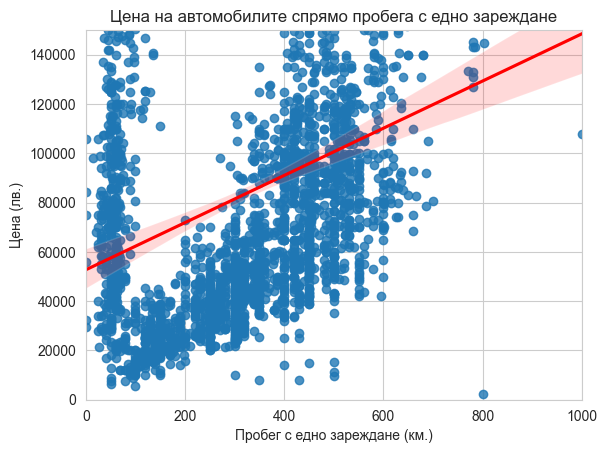

In [42]:
valid_indices = numeric_prices_no_outliers.index.intersection(dataset[ev_columns].dropna().index)

filtered_dataset = dataset.loc[valid_indices]
filtered_prices = numeric_prices_no_outliers.loc[valid_indices]

plt.ylim(0, 150000)
plt.xlim(0, 1000)
plt.title('Цена на автомобилите спрямо пробега с едно зареждане')
ax = sns.regplot(data=filtered_dataset, x='MilesPerFullCharge (EV)', y=filtered_prices, line_kws={'color': 'red'})
ax.set(xlabel='Пробег с едно зареждане (км.)', ylabel='Цена (лв.)')

Не виждаме изненади - пробегът с едно зареждане на електрическия автомобил е може би първото нещо, от което се интересува всеки потенциален купувач. Това е отразено и в търсената цена. Но на графиката ясно се открояват две групи наблюдения:
- автомобили с пробег до около 100км и цена, която варира в целия диапазон - Защо цената на автомобил с толкова малък пробег е толкова висока, обратно на тенденцията, която наблюдаваме?
- автомобили с вариращ пробег, при които видно цената се покачва с увеличаването на пробега

Една хипотеза, която бихме могли да проверим е, че този клъстър от скъпи автомобили с нисък пробег са всъщност хибридни автомобили, които комбинират електрическата енергия с тази, произведена от ДВГ (Двигател с вътрешно горене) и затова пробегът им на ток е нисък. Нека проверим тази хипотеза:

<Axes: title={'center': 'Цена на автомобилите спрямо пробега с едно зареждане'}, xlabel='Пробег с едно зареждане (км.)', ylabel='Цена (лв.)'>

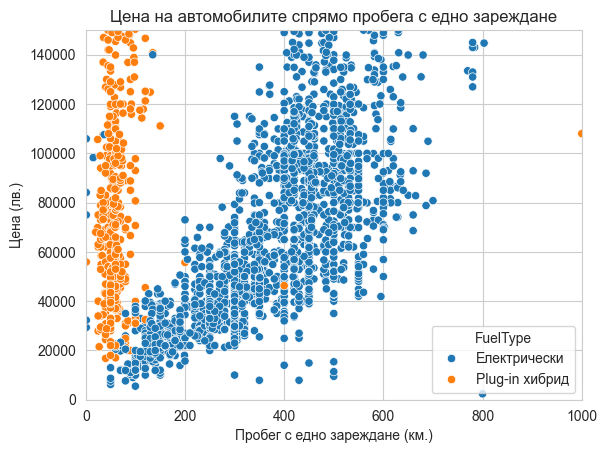

In [43]:
plt.ylim(0, 150000)
plt.xlim(0, 1000)

plt.title('Цена на автомобилите спрямо пробега с едно зареждане')
plt.xlabel('Пробег с едно зареждане (км.)')
plt.ylabel('Цена (лв.)')
sns.scatterplot(data=filtered_dataset, x='MilesPerFullCharge (EV)', y=filtered_prices, hue='FuelType')

Изглежда, че тази хипотеза е вярна - клъстерът е съставен изключително от Plug-in хибриди, чиято цена варира драстично в зависимост от модела и марката.

## Пробег

Следва да разгледаме изключително важна характеристика за всеки употребяван автомобил - неговият пробег. Всеки шофьор знае, че големият пробег намалява цената на автомобила драстично. Нека проверим как всъщност пробегът влияе на цената на автомобила:

In [44]:
dataset['Mileage'].describe(include='all')

count     99281.00
mean     179730.93
std      148739.99
min           1.00
25%      125635.00
50%      183000.00
75%      227150.00
max     9999999.00
Name: Mileage, dtype: float64

Средният пробег на употребяван автомобил в България е ок. 180 000 км. Отново срещаме подозрително високи/ниски стойности, които ще трябва да премахнем. 

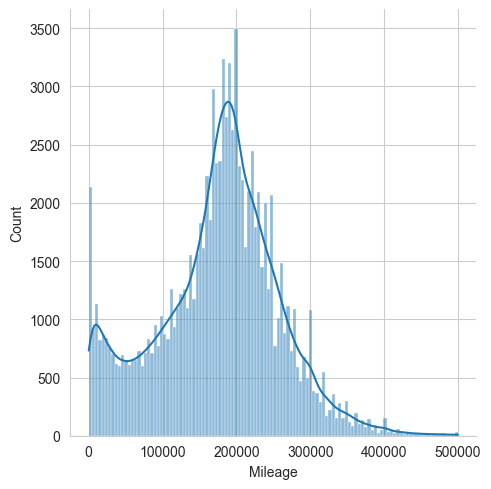

In [45]:
miles = dataset['Mileage'].dropna().astype(float)
miles.drop(miles[miles > 500000].index, inplace=True)

sns.displot(miles, kde=True)

Повечето автомобили са с пробег между 150 000 и 250 000 км, като стойностите над 400 000 км са много редки и ще ги считаме за аутлайъри.

<Axes: title={'center': 'Разпределение на пробега на автомобилите'}, ylabel='Пробег (км.)'>

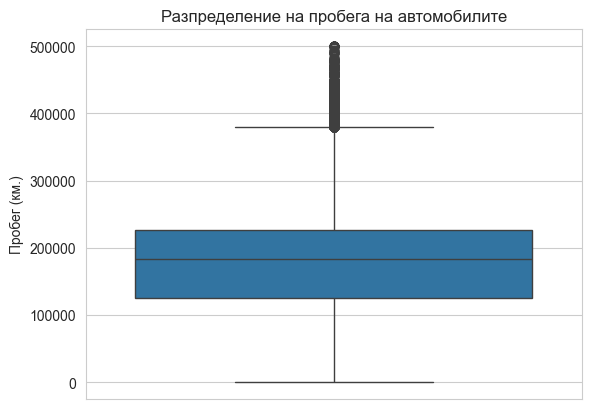

In [46]:
plt.title('Разпределение на пробега на автомобилите')
plt.ylabel('Пробег (км.)')
sns.boxplot(miles)

<Axes: title={'center': 'Цена на автомобилите спрямо пробега'}, xlabel='Mileage', ylabel='Price'>

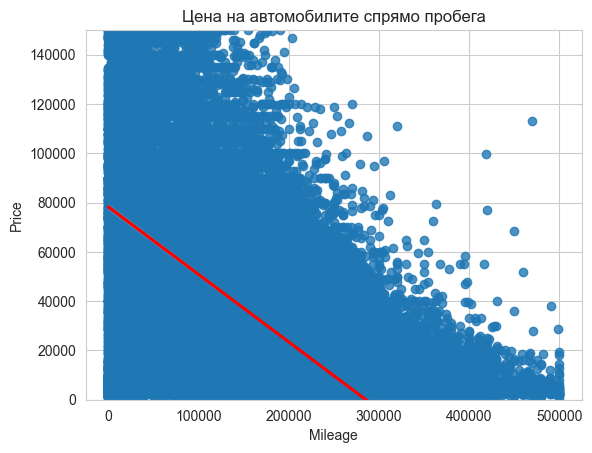

In [47]:
valid_indices = numeric_prices_no_outliers.index.intersection(miles.index)

filtered_dataset = dataset.loc[valid_indices]
filtered_prices = numeric_prices_no_outliers.loc[valid_indices]

plt.ylim(0, 150000)
plt.title('Цена на автомобилите спрямо пробега')
plt.xlabel('Пробег (км.)')
plt.ylabel('Цена (лв.)')
sns.regplot(data=filtered_dataset, x='Mileage', y=filtered_prices, line_kws={'color': 'red'})

До около 100 000 км. наблюдаваме автомобили с цени, разпръснати в целия ценови диапазон - явно пробегът не оказва достатъчно голямо влияние при такива автомобили. След тази граница, обаче, цената започва видимо да намалява с увеличаването на пробега.

## Данни за местоположението

Колоните описващи местоположението на автомобила също представляват интерес за нас. Икономическота положение може да варира драстично в различните области на България и това може да окаже влияние на паричната стойност на автомобилите, които хората употребяват в тях. Да разгледаме тези колони:

In [48]:
location_columns = ['Region', 'City']

dataset[location_columns].describe(include='all')

Region       City
count   99691      99690
unique     29       1035
top     София  гр. София
freq    35505      32722

Имаме автомобили от всички области в България, но има и още една стойност, която не знаем какво представлява - областите в България са само 28. Да погледнем стойностите в тази колона по-подробно:

In [49]:
dataset['Region'].value_counts()

Region
София             35505
Пловдив           11492
Варна              5869
Стара Загора       4035
Бургас             3975
Враца              3928
Благоевград        3205
Пазарджик          2929
Плевен             2907
Хасково            2839
Велико Търново     2646
Дупница            2627
Русе               2555
Сливен             2325
Перник             2142
Шумен              1460
Габрово            1346
Кюстендил          1033
Ловеч              1004
Монтана             962
Кърджали            757
Добрич              694
Търговище           596
Ямбол               592
Смолян              533
Разград             509
Извън страната      450
Видин               397
Силистра            379
Name: count, dtype: int64

Оказва се, че 29-тата област всъщност показва автомобили от чужбина. За всеки случай би било добре да премахнем такива записи от данните, тъй като в дадената цена може да присъстват разходи за внасяне на автомобила в страната, които не произлизат от самия автомобил. Без изненада най-много автомобили се продават в столицата - София, следвана от Пловдив и Варна. Да видим как са разпределени областите по брой обяви:

([<matplotlib.patches.Wedge at 0x16b5ef350>,
 [Text(0.48035951662009385, 0.9895730062974181, 'София'),
  Text(-0.9425270077123816, 0.5671356449146395, 'Пловдив'),
  Text(-1.0999838384151692, -0.005962820258171051, 'Варна'),
  Text(-1.045011104839885, -0.343441102317884, 'Стара Загора'),
  Text(-0.9261209208335069, -0.593548683761069, 'Бургас'),
  Text(-0.7512477129453223, -0.8035091000072263, 'Враца'),
  Text(-0.5532486425448782, -0.9507449392567124, 'Благоевград'),
  Text(-0.36030585694942713, -1.0393169340715753, 'Пазарджик'),
  Text(-0.16416265219490037, -1.0876813060930746, 'Плевен'),
  Text(0.034399301574638906, -1.0994619993665888, 'Хасково'),
  Text(0.22298394702532276, -1.0771620859318287, 'Велико Търново'),
  Text(0.39808200412058864, -1.0254417184781082, 'Дупница'),
  Text(0.5594992014652289, -0.9470800618531526, 'Русе'),
  Text(0.6979696944369642, -0.8501989800320693, 'Сливен'),
  Text(0.8103527968538646, -0.7438604335701149, 'Перник'),
  Text(0.8893929948372188, -0.64728672

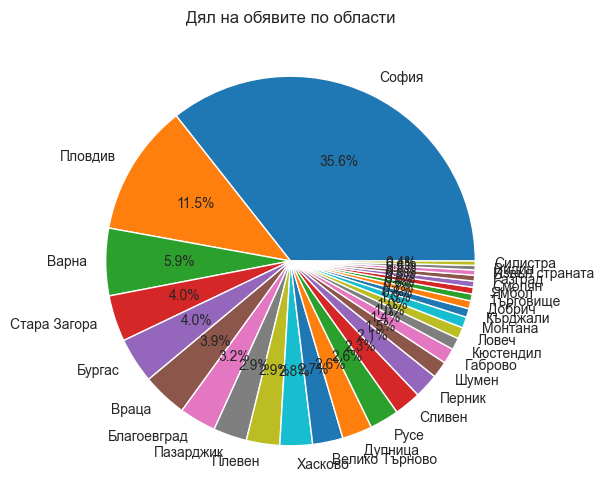

In [50]:
plt.figure(figsize=(12, 6))
plt.title('Дял на обявите по области')
plt.pie(dataset['Region'].value_counts(), labels=dataset['Region'].value_counts().index, autopct='%1.1f%%')

Над половината от обявите са в трите най-големи области в България - София, Пловдив и Варна. Да видим дали в областите, където се намират най-големите градове, цените на автомобилите са по-високи:

<Axes: title={'center': 'Цена на автомобилите спрямо областта'}, xlabel='Цена (лв.)', ylabel='Област'>

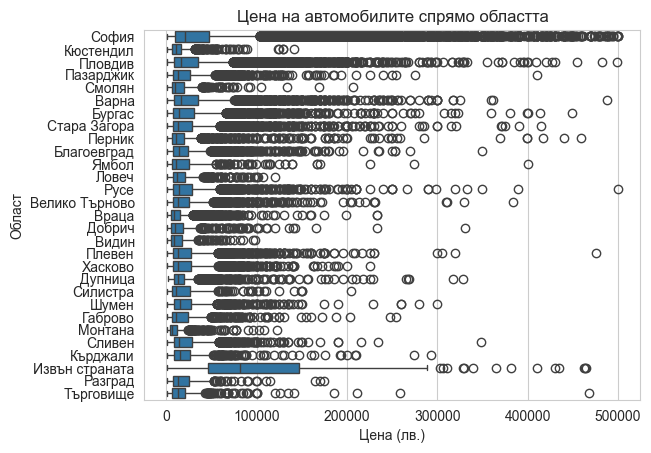

In [51]:
valid_indices = numeric_prices_no_outliers.index.intersection(dataset[location_columns].dropna().index)

filtered_dataset = dataset.loc[valid_indices]
filtered_prices = numeric_prices_no_outliers.loc[valid_indices]

plt.title('Цена на автомобилите спрямо областта')
plt.xlabel('Цена (лв.)')
plt.ylabel('Област')
sns.boxplot(data=filtered_dataset, x=filtered_prices, y='Region')

Единствената по-голяма разлика в цените виждаме при автомобилите от чужбина. Този факт потвърждава гореизложената хипотеза, че цената на автомобилите от чужбина може да е по-висока поради разходите за внасяне на автомобила и свързани разходи.

## Екстри

Нека видим и наличната информация за екстрите, с които разполага всеки автомобил. Тези данни със сигурност имат голямо знаяение за цената на автомобила и ще бъде от голяма полза да ги разгледаме подробно и да ги преработим по най-добрия начин:

In [52]:
dataset.columns

Index(['Make', 'Model', 'BodyType', 'ManufactureDate', 'FuelType',
       'Transmission', 'EngineSize', 'Horsepower', 'EuroStandard', 'Mileage',
       'MilesPerFullCharge (EV)', 'BatteryCapacity (EV)', 'Color', 'VIN',
       'Price', 'SafetyFeatures', 'ComfortFeatures', 'OtherFeatures',
       'ExteriorFeatures', 'SecurityFeatures', 'InteriorFeatures',
       'SpecialisedFeatures', 'Region', 'City', 'ViewCount', 'OfferTitle'],
      dtype='object')

In [53]:
extras_columns = ['SafetyFeatures', 'ComfortFeatures', 'OtherFeatures', 'ExteriorFeatures', 'InteriorFeatures', 'SecurityFeatures', 'SpecialisedFeatures']

dataset[extras_columns].sample(15)

SafetyFeatures  \
40530                                         Парктроник   
24217  Антиблокираща система, Въздушни възглавници - ...   
59827  Антиблокираща система, Въздушни възглавници - ...   
87254                      Въздушни възглавници - Предни   
76802  Антиблокираща система, Въздушни възглавници - ...   
70268  Антиблокираща система, Въздушни възглавници - ...   
5207   GPS система за проследяване, Автоматичен контр...   
91004  GPS система за проследяване, Адаптивни предни ...   
47646  Антиблокираща система, Въздушни възглавници - ...   
2400   Автоматичен контрол на стабилността, Адаптивни...   
63940                                                NaN   
42458  GPS система за проследяване, Автоматичен контр...   
5327   GPS система за проследяване, Автоматичен контр...   
80239  GPS система за проследяване, Автоматичен контр...   
94459  Адаптивни предни светлини, Антиблокираща систе...   

                                         ComfortFeatures  \
40530                                                NaN   
24217  Bluetooth \ handsfree система, USB, audio\vide...   
59827  Bluetooth \ handsfree система, Бордкомпютър, Е...   
87254  Bluetooth \ handsfree система, DVD, TV, USB, a...   
76802  Bluetooth \ handsfree система, DVD, TV, USB, a...   
70268  Бордкомпютър, Датчик за светлина, Ел. Огледала...   
5207   DVD, TV, Steptronic, Tiptronic, Адаптивно възд...   
91004  Bluetooth \ handsfree система, USB, audio\vide...   
47646  Auto Start Stop function, Bluetooth \ handsfre...   
2400   Bluetooth \ handsfree система, DVD, TV, Steptr...   
63940                                                NaN   
42458  Bluetooth \ handsfree система, DVD, TV, Steptr...   
5327   Auto Start Stop function, Bluetooth \ handsfre...   
80239  Auto Start Stop function, Bluetooth \ handsfre...   
94459  Bluetooth \ handsfree система, USB, audio\vide...   

                                           OtherFeatures  \
40530                                                4x4   
24217                                      С регистрация   
59827                          Нов внос, Сервизна книжка   
87254               4x4, Газова уредба, Напълно обслужен   
76802  7 места, Напълно обслужен, Нов внос, Сервизна ...   
70268                                    Сервизна книжка   
5207                4x4, Напълно обслужен, С регистрация   
91004                          Нов внос, Сервизна книжка   
47646     4x4, Напълно обслужен, Нов внос, С регистрация   
2400                4x4, Напълно обслужен, С регистрация   
63940                                                NaN   
42458            4x4, Бартер, Напълно обслужен, Нов внос   
5327                4x4, Напълно обслужен, С регистрация   
80239  Бартер, Напълно обслужен, Нов внос, С регистра...   
94459  4x4, Напълно обслужен, С регистрация, Сервизна...   

                                        ExteriorFeatures  \
40530                                                NaN   
24217  4(5) Врати, Лети джанти, Металик, Халогенни фа...   
59827  2(3) Врати, Лети джанти, Металик, Халогенни фа...   
87254                                         2(3) Врати   
76802  4(5) Врати, Ксенонови фарове, Лети джанти, Мет...   
70268  4(5) Врати, Ксенонови фарове, Лети джанти, Мет...   
5207   LED фарове, Ксенонови фарове, Лети джанти, Мет...   
91004                       4(5) Врати, Халогенни фарове   
47646          4(5) Врати, Лети джанти, Халогенни фарове   
2400   4(5) Врати, Ксенонови фарове, Лети джанти, Мет...   
63940                                                NaN   
42458  4(5) Врати, Ксенонови фарове, Лети джанти, Мет...   
5327   4(5) Врати, LED фарове, Лети джанти, Металик, ...   
80239  4(5) Врати, Лети джанти, Металик, Рейлинг на п...   
94459                             4(5) Врати, LED фарове   

                 InteriorFeatures                     SecurityFeatures  \
40530                 Десен волан                                  NaN   
24217                         NaN         Аларма, 

Данните не са представени по най-добрия начин за обработка и анализ. Екстрите са групирани в няколко категории, като всяка категория съдържа списък от екстри, разделени със запетаи. Това не е подходящо за анализ, както и за обучение на модел, тъй като всеки списък от екстри ще бъде третиран като една стойност, като това не само драстично увеличава възможните стойности/пермутации (кардиналността) на колоната, но и ще повлияе негативно на качеството на модела, тъй като не всички екстри оказват еднакво влияние върху цената на автомобила, и това ще попречи на модела да научи тези връзки, когато екстри с различно влияние са групирани в една стойност.
Затова ще бъде добре при обработката на данните да отделим всяка екстра в отделна колона, като стойността на всяка колона ще бъде булева - дали даден автомобил разполага с тази екстра или не. Това ще ни позволи да анализираме влиянието на всяка екстра върху цената на автомобила и ще подготви данните за обучение на модела.

In [54]:
exploded_features = dataset[extras_columns].copy()

exploded_features = exploded_features.fillna('')

for column in exploded_features.columns:
    exploded_features = exploded_features.join(exploded_features[column].str.get_dummies(sep=', ').add_prefix(column + '_'))

exploded_features.sample(15)

SafetyFeatures  \
28408  Антиблокираща система, Въздушни възглавници - ...   
73922  Автоматичен контрол на стабилността, Антиблоки...   
56968                                                      
74903                                                      
37794  Автоматичен контрол на стабилността, Адаптивни...   
12650  Контрол на налягането на гумите, Система ISOFI...   
46007                                                      
26338                                                      
14987  GPS система за проследяване, Автоматичен контр...   
62975  Антиблокираща система, Въздушни възглавници - ...   
10424  Антиблокираща система, Въздушни възглавници - ...   
81238  Антиблокираща система, Въздушни възглавници - ...   
78766                                                      
28403                                                      
96790  Автоматичен контрол на стабилността, Адаптивни...   

                                         ComfortFeatures  \
28408  Бордкомпютър, Ел. Огледала, Ел. Стъкла, Ел. ус...   
73922  Auto Start Stop function, Bluetooth \ handsfre...   
56968                                                      
74903                                                      
37794  Bluetooth \ handsfree система, DVD, TV, Steptr...   
12650  Auto Start Stop function, Датчик за светлина, ...   
46007                                                      
26338                                           Климатик   
14987  Auto Start Stop function, Bluetooth \ handsfre...   
62975  Бордкомпютър, Датчик за светлина, Ел. Огледала...   
10424  Auto Start Stop function, USB, audio\video, IN...   
81238  USB, audio\video, IN\AUX изводи, Бордкомпютър,...   
78766                                                      
28403                                                      
96790  Auto Start Stop function, Bluetooth \ handsfre...   

                                OtherFeatures  \
28408               Нов внос, Сервизна книжка   
73922  Лизинг, С регистрация, Сервизна книжка   
56968                                           
74903                                           
37794          4x4, Нов внос, Сервизна книжка   
12650                Бартер, Лизинг, Нов внос   
46007                           Газова уредба   
26338                                           
14987    4x4, Напълно обслужен, С регистрация   
62975  4x4, Лизинг, Нов внос, Сервизна книжка   
10424         Напълно обслужен, С регистрация   
81238                           4x4, Нов внос   
78766                                     4x4   
28403                                           
96790          4x4, Нов внос, Сервизна книжка   

                                        ExteriorFeatures InteriorFeatures  \
28408                   4(5) Врати, Лети джанти, Металик                    
73922                       4(5) Врати, Халогенни фарове                    
56968                                                                       
74903                                                                       
37794  4(5) Врати, LED фарове, Ксенонови фарове, Лети...      Кожен салон   
12650                            4(5) Врати, Лети джанти                    
46007                                         4(5) Врати                    
26338                                                                       
14987                Лети джанти, Металик, Панорамен люк      Кожен салон   
62975  4(5) Врати, Лети джанти, Металик, Рейлинг на п...                    
10424          4(5) Врати, Лети джанти, Халогенни фарове                    
81238                                4(5) Врати, Металик    Велурен салон   
78766                                                                       
28403                                                                       
96790  4(5) Врати, LED фарове, Ксенонови фарове, Лети...                    

                   SecurityFeatures SpecialisedFeatures  \
28408  Аларма, Централно заключване        

In [55]:
dataset_with_exploded_features = dataset.join(exploded_features.drop(columns=extras_columns))

dataset_with_exploded_features.drop(columns=extras_columns, inplace=True)

dataset_with_exploded_features.sample(15)

Make           Model BodyType ManufactureDate  FuelType  \
88441         Toyota           Yaris   Хечбек         03/2021  Бензинов   
84637         Toyota         Avensis    Седан         09/2005   Дизелов   
4447            Audi              A5    Седан         07/2011  Бензинов   
30730           Ford           Focus   Хечбек         05/2000   Дизелов   
50332  Mercedes-Benz         CLS 350     Купе         01/2019   Дизелов   
61077         Nissan            Gt-r     Купе         08/2013  Бензинов   
32362     Great Wall            Poer    Пикап             NaN  Бензинов   
88577         Toyota           Yaris   Хечбек         06/2008   Дизелов   
16088            BMW             525    Комби         01/2008   Дизелов   
85017         Toyota            C-HR     Джип         08/2019  Хибриден   
19794            BMW              X5     Джип         03/2012   Дизелов   
76855           Seat           Altea      Ван         03/2008   Дизелов   
72242        Peugeot          Expert    Пикап         07/2010   Дизелов   
38882           Jeep  Grand cherokee     Джип         10/1999  Бензинов   
19969            BMW              X5     Джип         05/2012   Дизелов   

      Transmission  EngineSize  Horsepower EuroStandard   Mileage  ...  \
88441        Ръчна         NaN      261.00       Евро 6  11000.00  ...   
84637  Автоматична         NaN      116.00          NaN 373000.00  ...   
4447   Автоматична         NaN      211.00       Евро 5 235829.00  ...   
30730        Ръчна     1800.00       90.00          NaN 202505.00  ...   
50332  Автоматична     2988.00      286.00          NaN 172000.00  ...   
61077  Автоматична         NaN      630.00       Евро 5  59500.00  ...   
32362  Автоматична         NaN      190.00       Евро 6       NaN  ...   
88577        Ръчна     1400.00       90.00       Евро 4 200000.00  ...   
16088  Автоматична     3000.00      197.00       Евро 4 299000.00  ...   
85017  Автоматична     1800.00      122.00       Евро 6 133365.00  ...   
19794  Автоматична     2993.00      306.00       Евро 5 270000.00  ...   
76855        Ръчна         NaN      105.00       Евро 4 180000.00  ...   
72242        Ръчна     2000.00      120.00          NaN 126000.00  ...   
38882  Автоматична     4700.00      220.00          NaN 263000.00  ...   
19969  Автоматична     3000.00      286.00       Евро 5 175000.00  ...   

       SecurityFeatures_Каско  SecurityFeatures_Лебедка  \
88441                       0                         0   
84637                       0                         0   
4447                        0                         0   
30730                       0                         0   
50332                       0                         0   
61077                       1                         0   
32362                       0                         0   
88577                       0                         0   
16088                       0                         0   
85017                       0                         0   
19794                       0                         0   
76855                       0                         0   
72242                       0                         0   
38882                       0                         0   
19969                       0                         0   

      SecurityFeatures_Централно заключване SpecialisedFeatures_TAXI  \
88441                                     1                        0   
84637                                     0                        0   
4447                                      1                        0   
30730                                     1                        0   
50332                                     1                        0   
61077                                     1                        0   
32362                                     1                        0   
88577                                     0                        0   
16088                                

Може би ще бъде най-подходящо да разгледаме връзката между броя на екстрите във всяка категория и цената на автомобила:

In [56]:
dataset_with_total_features = dataset_with_exploded_features.copy()

dataset_with_total_features['TotalSafetyFeatures'] = dataset_with_exploded_features.filter(like='SafetyFeatures').sum(axis=1)
dataset_with_total_features['TotalComfortFeatures'] = dataset_with_exploded_features.filter(like='ComfortFeatures').sum(axis=1)
dataset_with_total_features['TotalOtherFeatures'] = dataset_with_exploded_features.filter(like='OtherFeatures').sum(axis=1)
dataset_with_total_features['TotalExteriorFeatures'] = dataset_with_exploded_features.filter(like='ExteriorFeatures').sum(axis=1)
dataset_with_total_features['TotalInteriorFeatures'] = dataset_with_exploded_features.filter(like='InteriorFeatures').sum(axis=1)
dataset_with_total_features['TotalSecurityFeatures'] = dataset_with_exploded_features.filter(like='SecurityFeatures').sum(axis=1)
dataset_with_total_features['TotalSpecialisedFeatures'] = dataset_with_exploded_features.filter(like='SpecialisedFeatures').sum(axis=1)

dataset_with_total_features.sample(15)

Make               Model BodyType ManufactureDate  FuelType  \
60848     Mitsubishi          Space star   Хечбек         01/2017  Бензинов   
80839      SsangYong             Korando     Джип         03/2000   Дизелов   
69775        Peugeot                3008      Ван         01/2015   Дизелов   
42288     Land Rover   Range Rover Sport     Джип         02/2007   Дизелов   
42170     Land Rover  Range Rover Evoque     Джип         05/2018   Дизелов   
74102        Renault                Clio   Хечбек         02/2021  Хибриден   
43039          Lexus                  NX     Джип         04/2020  Хибриден   
5072            Audi                  A6    Комби         07/2011   Дизелов   
63886           Opel               Astra    Комби         03/2006  Бензинов   
92074             VW                Golf   Хечбек         09/2011  Бензинов   
35031        Hyundai             Elantra    Седан         08/2018  Бензинов   
52542  Mercedes-Benz               E 350    Седан         05/2011   Дизелов   
96167             VW            Scirocco   Хечбек         11/2010  Бензинов   
89460             VW                Bora    Седан         03/1999  Бензинов   
4324            Audi                  A5     Купе         08/2017  Бензинов   

      Transmission  EngineSize  Horsepower EuroStandard   Mileage  ...  \
60848        Ръчна         NaN       70.00       Евро 6  46740.00  ...   
80839        Ръчна     2300.00      100.00          NaN 210840.00  ...   
69775  Автоматична     1600.00      115.00       Евро 5 179000.00  ...   
42288  Автоматична     2700.00      190.00       Евро 4 183000.00  ...   
42170  Автоматична     2000.00      150.00       Евро 6 136600.00  ...   
74102  Автоматична     1600.00      145.00       Евро 6  37000.00  ...   
43039  Автоматична         NaN      197.00       Евро 6   8699.00  ...   
5072   Автоматична     3000.00      245.00       Евро 5 247164.00  ...   
63886        Ръчна     2000.00      170.00          NaN 256000.00  ...   
92074        Ръчна     1200.00      125.00       Евро 5 180000.00  ...   
35031  Автоматична         NaN      150.00       Евро 6  75438.00  ...   
52542  Автоматична     3500.00      231.00          NaN 190000.00  ...   
96167        Ръчна         NaN      160.00       Евро 5  96000.00  ...   
89460        Ръчна     1600.00      101.00       Евро 3 330000.00  ...   
4324   Автоматична         NaN      190.00       Евро 6 136000.00  ...   

       SpecialisedFeatures_Учебен  SpecialisedFeatures_Хладилен  \
60848                           0                             0   
80839                           0                             0   
69775                           0                             0   
42288                           0                             0   
42170                           0                             0   
74102                           0                             0   
43039                           0                             0   
5072                            0                             0   
63886                           0                             0   
92074                           0                             0   
35031                           0                             0   
52542                           0                             0   
96167                           0                             0   
89460                           0                             0   
4324                            0                             0   

      SpecialisedFeatures_Хомологация N1 TotalSafetyFeatures  \
60848                                  0                   6   
80839                                  0                   1   
69775                                  0                  11   
42288                                  0                   9   
42170                                  0                  18   
74102                                  0                  17   
43039                                  0     

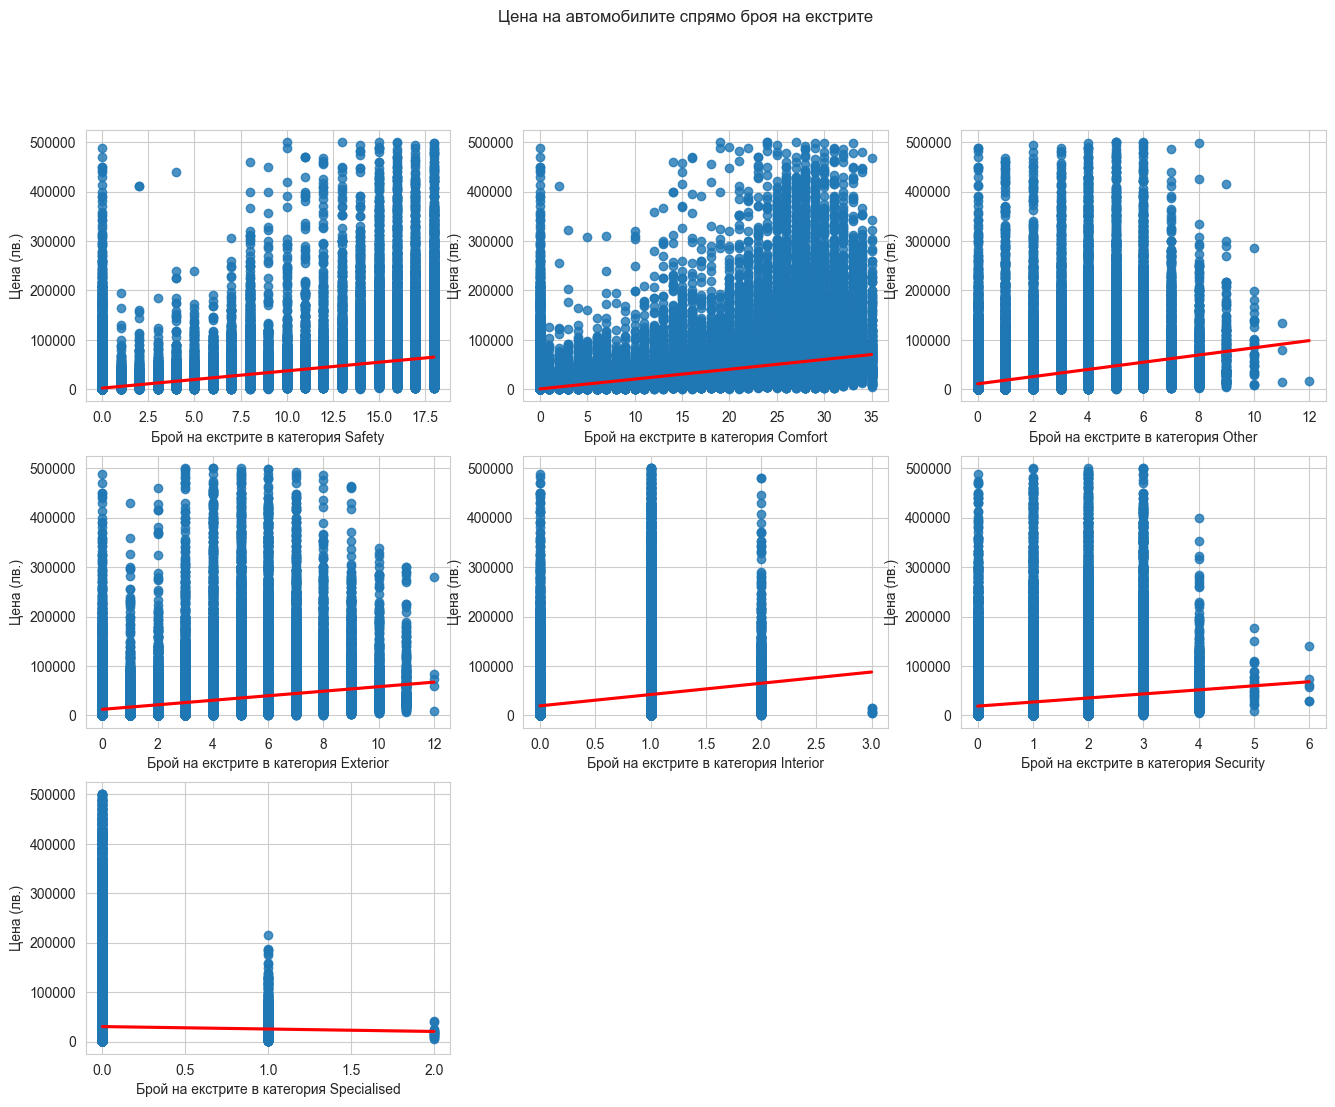

In [57]:
total_features_columns = ['TotalSafetyFeatures', 'TotalComfortFeatures', 'TotalOtherFeatures', 'TotalExteriorFeatures', 'TotalInteriorFeatures', 'TotalSecurityFeatures', 'TotalSpecialisedFeatures']

valid_indices = numeric_prices_no_outliers.index.intersection(dataset_with_total_features.index)

filtered_dataset = dataset_with_total_features.loc[valid_indices]
filtered_prices = numeric_prices_no_outliers.loc[valid_indices]

plt.figure(figsize=(16, 12))
plt.suptitle('Цена на автомобилите спрямо броя на екстрите')

for column in total_features_columns:
    plt.subplot(3, 3, total_features_columns.index(column) + 1)
    ax = sns.regplot(data=filtered_dataset, x=f'{column}', y=filtered_prices, line_kws={'color': 'red'})
    ax.set(xlabel=f'Брой на екстрите в категория {column.removeprefix("Total").removesuffix('Features')}', ylabel='Цена (лв.)')

Всички графики показват, че по-голям брой на екстрите във всяка категория води до по-висока цена. Единствено при специализираните екстри това не е така. Нека разгледаме тези екстри по-подробно: 

In [58]:
dataset_with_exploded_features.filter(like='SpecialisedFeatures').columns.values

array(['SpecialisedFeatures_TAXI',
       'SpecialisedFeatures_За хора с увреждания',
       'SpecialisedFeatures_Катафалка', 'SpecialisedFeatures_Линейка',
       'SpecialisedFeatures_Учебен', 'SpecialisedFeatures_Хладилен',
       'SpecialisedFeatures_Хомологация N1'], dtype=object)

Откриваме, че всъщност специализираните екстри не представляват отделни подобрения, а представляват специализирана версия на автомобила като: Линейка, Катафалка, Учебен, предназначен за хора с увреждания и др. Струва си да разгледаме как всяка от тези колони влияе на цената на автомобила:

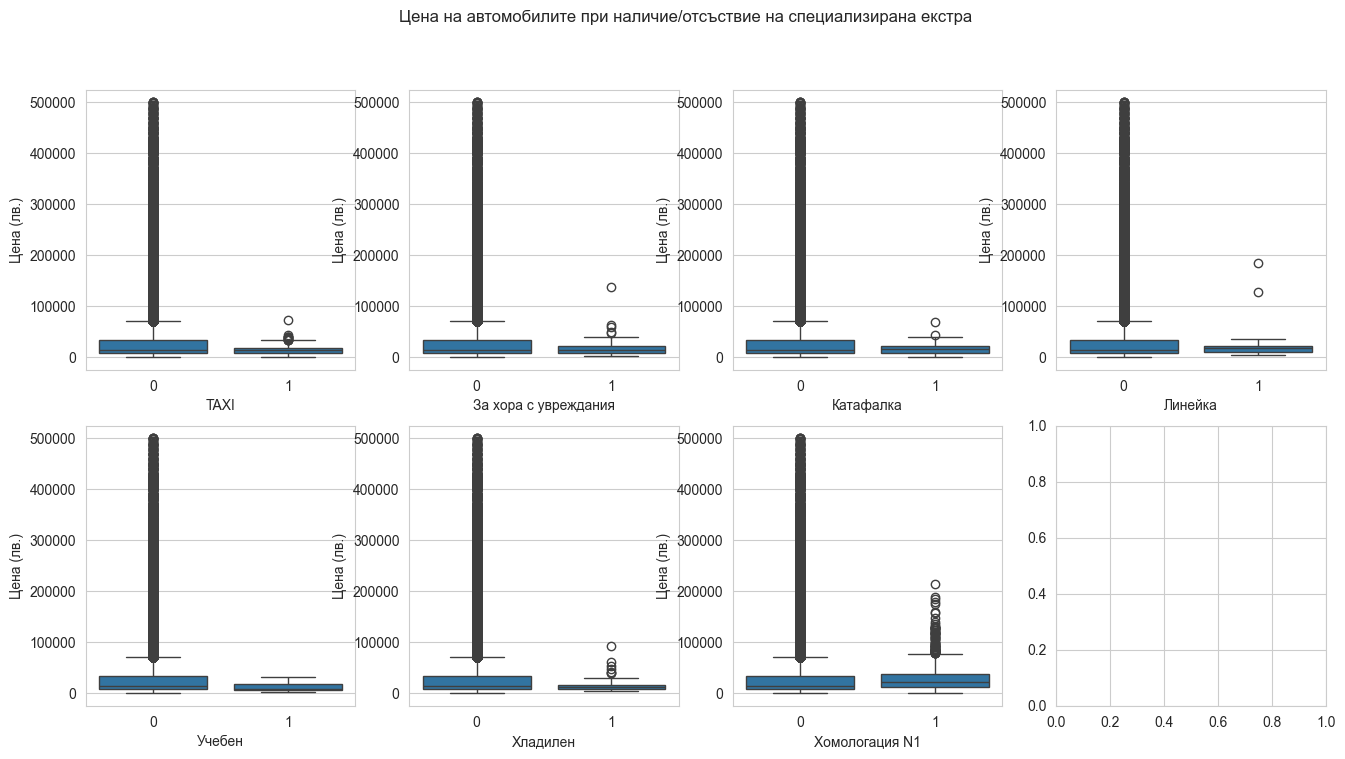

In [59]:
plt.subplots(2, 4, figsize=(16, 8))
plt.suptitle('Цена на автомобилите при наличие/отсъствие на специализирана екстра')

for column in dataset_with_exploded_features.filter(like='SpecialisedFeatures').columns:
    plt.subplot(2, 4, dataset_with_exploded_features.filter(like='SpecialisedFeatures').columns.get_loc(column) + 1)
    sns.boxplot(data=filtered_dataset, x=column, y=filtered_prices)
    plt.xlabel(column.removeprefix('SpecialisedFeatures_'))
    plt.ylabel('Цена (лв.)')

За повечето колони наблюдаваме спад на цената, ако автомобилът е класифициран с някоя от тези категории. Това е разбираемо - такситата, линейките, катафалките и учебните автомобили обикновено имат много голям пробег поради интензивната им употреба и съответно са по-евтини. Единствено автомобилите с хомологация N1 са по-скъпи от останалите. При проверка какво всъщност означава автомобил да притежава тази категория откриваме, че автомобилите от клас N1 са товарни автомобили с маса до 3.5 тона (т.е. леки автомобили от категория B) и за тях се прилагат данъчни облекчения, тъй като често такива автомобили са фирмени и се използват за търговска дейност. Именно това ги прави по-скъпи от останалите.

## Цвят, VIN номер

Тези колони едва ли ще ни подскажат много за цената на автомобила, но все пак ще ги разгледаме:

In [60]:
dataset[['Color', 'VIN']].describe()

Color                VIN
count   94525              10033
unique     41              10033
top     Черен  ZFA3120000JD72908
freq    25519                  1

Да видим все пак дали цвета оказва ефект върху цената:

<Axes: title={'center': 'Цена на автомобилите спрямо цвета'}, xlabel='Цена (лв.)', ylabel='Цвят'>

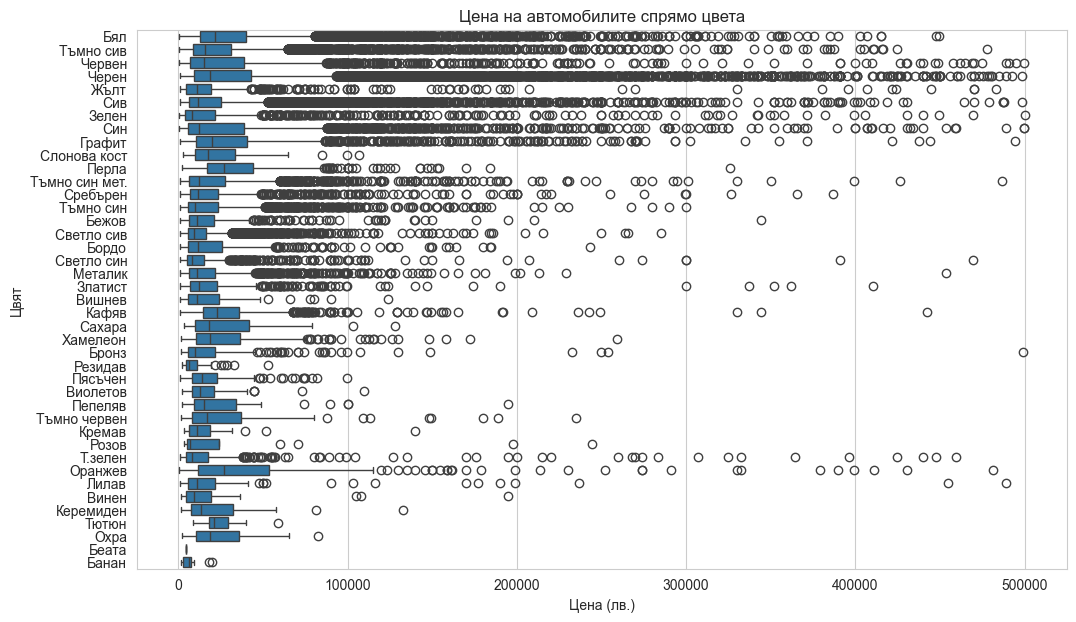

In [61]:
plt.figure(figsize=(12, 7))
plt.title('Цена на автомобилите спрямо цвета')
plt.xlabel('Цена (лв.)')
plt.ylabel('Цвят')
sns.boxplot(data=filtered_dataset, x=numeric_prices_no_outliers, y='Color')

Няма ясна връзка между цвета на автомобила и цената му. Единствено някои цветове като зелен, розов, резидав и банан не са много предпочитани и цената им е по-ниска.

## Корелация на колоните с цената на автомобила

### Корелация на числовите колони с цената

<Axes: title={'center': 'Корелация на числовите колони с цената на автомобила'}, xlabel='Корелация', ylabel='Колона'>

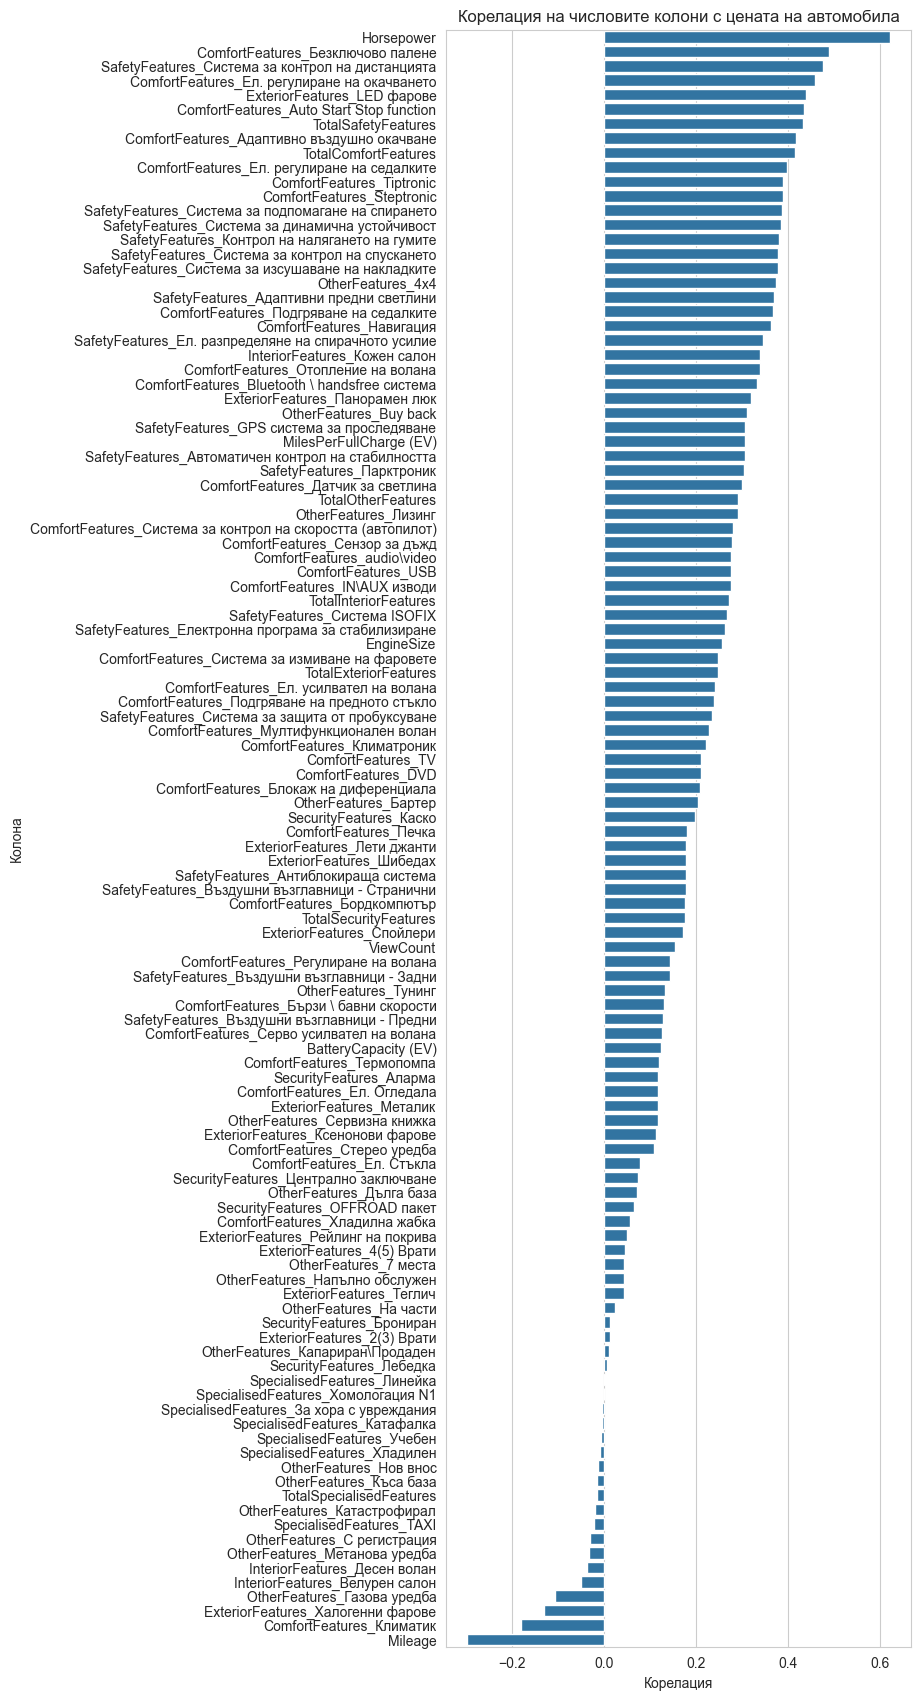

In [62]:
correlation_price = filtered_dataset.select_dtypes(include=np.number).loc[filtered_prices.index].corrwith(filtered_prices)

plt.figure(figsize=(6, 21))
plt.title('Корелация на числовите колони с цената на автомобила')
plt.xlabel('Корелация')
plt.ylabel('Колона')

sns.barplot(correlation_price.sort_values(ascending=False), orient='h')

Видно е, че повечето колони имат положителна корелация с цената - по-голямата стойност в колоната допринася за по-висока цена, както вече установихме при прегледа на числовите колони. Откриваме и няколко колони с отрицателна корелация - по-голямата стойност в тях води до по-ниска цена. Това са колони като пробега (`Mileage`)

### Корелация на числовите колони помежду им

<Axes: title={'center': 'Корелационна матрица на числовите колони'}>

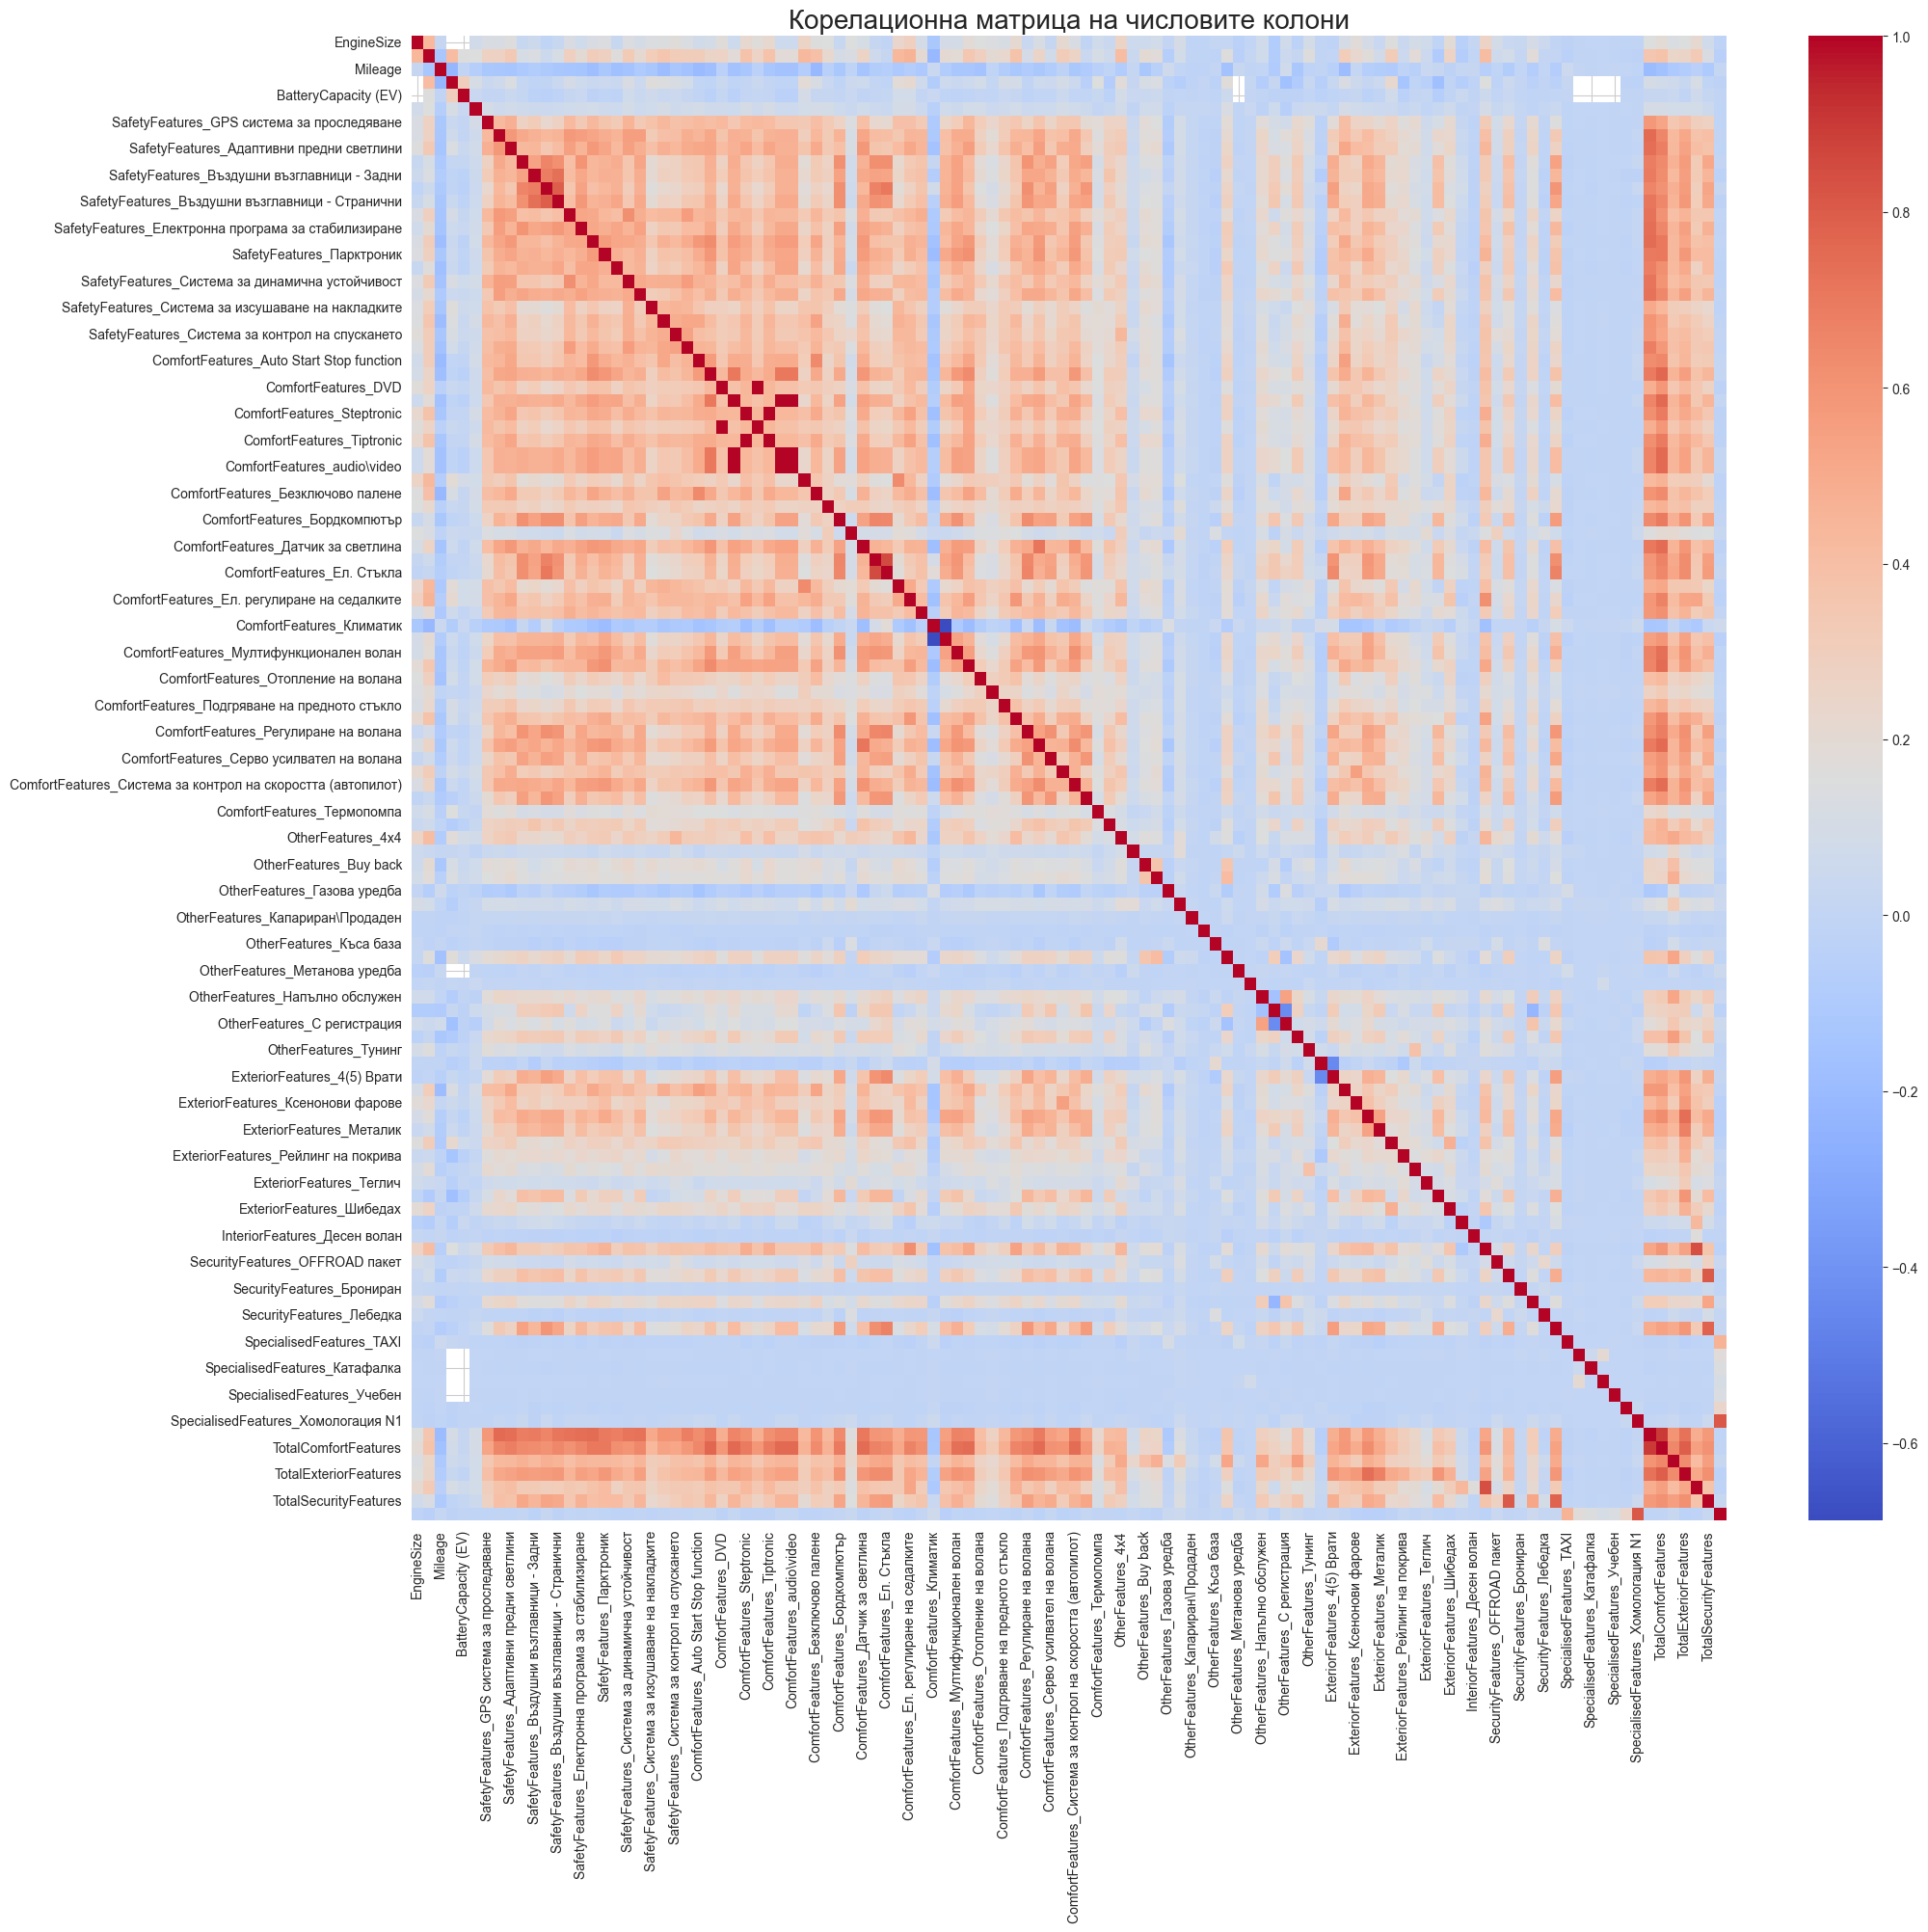

In [63]:
correlation_matrix = filtered_dataset.select_dtypes(include=np.number).loc[filtered_prices.index].corr()

plt.figure(figsize=(22, 20))
plt.title('Корелационна матрица на числовите колони', fontsize=20)

sns.heatmap(correlation_matrix, fmt='.2f', cmap='coolwarm')

Открояват се няколко колони с много силна корелация помежду си:
- `BatterySize (EV)` и `MilesPerFullCharge (EV)` - по-голямата батерия води до по-голям пробег, показват едно и също нещо
- `ComfortFeatures_TV` и `ComfortFeatures_DVD` - телевизорът и DVD-то винаги се срещат заедно
- `ComfortFeatures_USB`, `ComfortFeatures_audio/video` с `ComfortFeatures_IN\AUX изводи` - всички тези колони показват наличие на мултимедия в автомобила
- `ComfortFeatures_Климатик` и `ComfortFeatures_Климатроник` - силна отрицателна корелация, при наличие на климатроник, климатикът липсва и обратното
- `OtherFeatures_С регистрация` и `OtherFeatures_Нов внос` - силна отрицателна корелация, при нов внос автомобилът няма регистрация и обратно
- `ExteriorFeatures_2(3) врати` и `ExteriorFeatures_4(5) врати` - силна отрицателна корелация, автомобилите с 2(3) врати нямат 4(5) врати и обратно